## PROBLEM STATEMENT

In [ ]:
Problem Statement
A consumer finance company specializing in lending various types of loans to urban customers aims to understand the driving factors behind loan default, so that the company can utilize this knowledge for its portfolio and risk assessment. 
Whenever, the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks associated with the bank’s decision are as follows:
If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
The company aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. The company wants a system which can ensure that its consumers who are capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
 


In [392]:
# importing necessary libraries
import numpy as np,pandas as pd
import matplotlib.pyplot as plt,seaborn as sns   #Data Visualization Libraries


import warnings  #filtering out the warnings
warnings.filterwarnings("ignore")

#inline plotting
%matplotlib inline

In [393]:
pd.set_option('display.max_columns',500)    #It will display maximum 500 columns
pd.set_option('display.max_rows',500)       #It wiil also display maximum 500 rows  

In [394]:
app_data = pd.read_csv("application_data.csv")       #reading the application_data.csv file using '.csv' extension
app_data.head()       # we use head() to display the first 5 columns


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [395]:
pre_data=pd.read_csv("previous_application.csv")   #reading the previous_application.csv file using '.csv' file extension

In [397]:
#checking the first 5 rows
pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [398]:
app_data.info()  #info() will display the information about the data stored in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224169 entries, 0 to 224168
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(84), int64(22), object(16)
memory usage: 208.7+ MB


In [401]:
pre_data.info()   #this will display the information about the data stored in df_1 dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [400]:
print(app_data.shape)     #shape will tell you the number of columns and rows present in dataframe
print(app_data.columns)   #this will display the list of columns

(224169, 122)
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [402]:
app_data.describe()   #describe() - we use describe() to get the stastics calculations

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,224169.000000,224169.000000,224169.000000,2.241690e+05,2.241690e+05,224160.000000,2.239820e+05,224169.000000,224169.000000,224169.000000,224169.000000,224169.000000,76169.000000,224169.000000,224169.000000,224169.000000,224169.000000,224169.000000,224169.000000,224167.000000,224169.000000,224169.000000,224169.000000,224169.000000,224169.00000,224169.000000,224169.000000,224169.000000,224169.000000,97704.000000,2.236760e+05,179632.000000,110249.000000,92822.000000,114734.000000,75038.000000,67365.000000,104565.000000,111181.000000,112519.000000,71993.000000,90921.000000,70812.000000,111535.000000,68453.000000,100326.000000,110248.000000,92822.000000,114733.000000,75038.000000,67365.000000,104565.000000,111181.000000,112519.000000,71993.000000,90921.000000,70812.000000,111535.000000,68453.000000,100326.000000,110248.000000,92822.000000,114733.000000,75038.000000,67365.000000,104565.000000,111181.000000,112519.000000,71993.000000,90921.000000,70812.000000,111535.000000,68453.000000,100326.000000,115865.000000,223434.00000,223434.000000,223434.000000,223434.000000,224167.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.00000,224168.00000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,193877.000000,193877.000000,193877.000000,193877.000000,193877.000000,193877.000000
mean,229956.091146,0.081086,0.417141,1.688024e+05,5.991592e+05,27120.597872,5.384978e+05,0.020855,-16036.185347,63866.870049,-4986.062529,-2993.604383,12.081162,0.999996,0.819748,0.199265,0.998059,0.280788,0.056886,2.153698,2.052857,2.031918,12.064469,0.015158,0.05081,0.040510,0.078271,0.230661,0.179525,0.501691,5.140596e-01,0.510775,0.117423,0.088490,0.977686,0.752460,0.044755,0.078722,0.149808,0.226053,0.231699,0.066315,0.100722,0.107350,0.008877,0.028261,0.114207,0.087561,0.977003,0.759678,0.042680,0.074263,0.145279,0.222157,0.227995,0.064957,0.105573,0.105919,0.008144,0.026967,0.117792,0.087969,0.977720,0.755739

In [404]:
pre_data.describe()      #describe() will describe the  detail stastics value of dataset

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Data Cleaning:
Data Cleaning plays most important role in Data Science. We use data cleaning to clean unnecessary data ,missing values,incorrect format,incorrect headers,anomlies/outliers present in the dataset.

In [405]:
 #Let's find out the null values present in the dataset and get it's percentage.
inp0 = app_data.isnull().mean()*100    #Here what I have done - I  first calculated the null value present in each column and then multiply the null value with 100 to get null value percentage.
inp0.sort_values(ascending=False)  #Arranging the values in descending order


COMMONAREA_MODE                 69.949012
COMMONAREA_AVG                  69.949012
COMMONAREA_MEDI                 69.949012
NONLIVINGAPARTMENTS_MODE        69.463664
NONLIVINGAPARTMENTS_AVG         69.463664
NONLIVINGAPARTMENTS_MEDI        69.463664
FONDKAPREMONT_MODE              68.424715
LIVINGAPARTMENTS_MEDI           68.411333
LIVINGAPARTMENTS_AVG            68.411333
LIVINGAPARTMENTS_MODE           68.411333
FLOORSMIN_MODE                  67.884498
FLOORSMIN_AVG                   67.884498
FLOORSMIN_MEDI                  67.884498
YEARS_BUILD_MEDI                66.526148
YEARS_BUILD_MODE                66.526148
YEARS_BUILD_AVG                 66.526148
OWN_CAR_AGE                     66.021618
LANDAREA_MEDI                   59.440868
LANDAREA_MODE                   59.440868
LANDAREA_AVG                    59.440868
BASEMENTAREA_MODE               58.592847
BASEMENTAREA_MEDI               58.592847
BASEMENTAREA_AVG                58.592847
EXT_SOURCE_1                    56

### Removing those columns which are having more than 40% null values

In [406]:
#Checking the columns which are having more than 40% null values and creating a list of those columns.
null_data = app_data.isnull().sum()*100/len(app_data)
major_missing_data_columns = null_data[null_data>=40]
major_missing_data_columns


OWN_CAR_AGE                     66.021618
EXT_SOURCE_1                    56.415026
APARTMENTS_AVG                  50.818802
BASEMENTAREA_AVG                58.592847
YEARS_BEGINEXPLUATATION_AVG     48.818079
YEARS_BUILD_AVG                 66.526148
COMMONAREA_AVG                  69.949012
ELEVATORS_AVG                   53.354389
ENTRANCES_AVG                   50.403044
FLOORSMAX_AVG                   49.806173
FLOORSMIN_AVG                   67.884498
LANDAREA_AVG                    59.440868
LIVINGAPARTMENTS_AVG            68.411333
LIVINGAREA_AVG                  50.245128
NONLIVINGAPARTMENTS_AVG         69.463664
NONLIVINGAREA_AVG               55.245373
APARTMENTS_MODE                 50.819248
BASEMENTAREA_MODE               58.592847
YEARS_BEGINEXPLUATATION_MODE    48.818525
YEARS_BUILD_MODE                66.526148
COMMONAREA_MODE                 69.949012
ELEVATORS_MODE                  53.354389
ENTRANCES_MODE                  50.403044
FLOORSMAX_MODE                  49

In [407]:
#Dropping the columns from dataframe for further analysis
app_data_df =app_data.drop(columns=major_missing_data_columns.index)

In [408]:
app_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [409]:
app_data_df.shape           #Shape will tell you the number of rows and columns present in the dataset

(224169, 73)

In [410]:
len(app_data_df)           #The len() function returns the number of items in an object

224169

In [411]:
app_data_df.columns      #It will display the list of columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [412]:
# Getting Numerical columns from the application_data table
num=app_data_df.select_dtypes(include=['int64','float64']).columns
len(num)

61

In [413]:
# Getting Variable columns from the application_data table
var = app_data_df.select_dtypes(include='object').columns
len(var) 

12

From the above list as you can see there are still so many columns present which we don't need for analysis. I am going to make a list of those variables/columns and try to drop those columns from the dataframe.

## Dropping unnecessary columns

##### we found these columns to be unwanted or not required so we will drop them for further analysis,here are the unwanted columns which i found of no use.

In [414]:
unwanted_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','FLAG_MOBIL','NAME_TYPE_SUITE','HOUR_APPR_PROCESS_START',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'REG_REGION_NOT_LIVE_REGION', 'DAYS_ID_PUBLISH',
       'REGION_RATING_CLIENT', 'REGION_POPULATION_RELATIVE',
       'WEEKDAY_APPR_PROCESS_START', 'CNT_FAM_MEMBERS','REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
        
app_data_df.drop(columns=unwanted_cols, inplace=True)

In [415]:
unwanted_cols

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'NAME_TYPE_SUITE',
 'HOUR_APPR_PROCESS_START',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'REG_REGION_NOT_LIVE_REGION',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_POPULATION_RELATIVE',
 'WEEKDAY_APPR_PROCESS_START',
 'CNT_FAM_MEMBERS',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [416]:
app_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648,1,0,1,1,0,Laborers,2,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186,1,0,1,1,0,Core staff,1,School,0.622246,NaN,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260,1,1,1,1,0,Laborers,2,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833,1,0,1,0,0,Laborers,2,Business Entity Type 3,0.650442,NaN,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311,1,0,1,0,0,Core staff,2,Religion,0.322738,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [417]:
app_data_df.shape

(224169, 53)

In [418]:
#now we have the final dataframe for analysis.
# we will now dive deep into details of variables to find out insights
app_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224169 entries, 0 to 224168
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   224169 non-null  int64  
 1   TARGET                       224169 non-null  int64  
 2   NAME_CONTRACT_TYPE           224169 non-null  object 
 3   CODE_GENDER                  224169 non-null  object 
 4   CNT_CHILDREN                 224169 non-null  int64  
 5   AMT_INCOME_TOTAL             224169 non-null  float64
 6   AMT_CREDIT                   224169 non-null  float64
 7   AMT_ANNUITY                  224160 non-null  float64
 8   AMT_GOODS_PRICE              223982 non-null  float64
 9   NAME_INCOME_TYPE             224169 non-null  object 
 10  NAME_EDUCATION_TYPE          224169 non-null  object 
 11  NAME_FAMILY_STATUS           224169 non-null  object 
 12  NAME_HOUSING_TYPE            224169 non-null  object 
 13 

In [419]:
# we will describe to have a better look at variables
app_data_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,224169.000000,224169.000000,224169.000000,2.241690e+05,2.241690e+05,224160.000000,2.239820e+05,224169.000000,224169.000000,224169.000000,224169.000000,224169.000000,224169.000000,224169.000000,224169.000000,224169.000000,2.236760e+05,179632.000000,224167.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,224168.00000,224168.00000,224168.000000,224168.000000,224168.000000,224168.000000,224168.000000,193877.000000,193877.000000,193877.000000,193877.000000,193877.000000,193877.000000
mean,229956.091146,0.081086,0.417141,1.688024e+05,5.991592e+05,27120.597872,5.384978e+05,-16036.185347,63866.870049,-4986.062529,0.819748,0.199265,0.998059,0.280788,0.056886,2.031918,5.140596e-01,0.510775,-962.505168,0.000036,0.710315,0.000089,0.015154,0.088206,0.000236,0.081176,0.003863,0.000027,0.003948,0.000009,0.003488,0.002998,0.00120,0.01001,0.000259,0.008016,0.000562,0.000486,0.000326,0.006561,0.007144,0.034367,0.266865,0.264131,1.895320
std,74986.341189,0.272968,0.722982,2.696584e+05,4.024820e+05,14517.211366,3.695043e+05,4370.430754,141316.657218,3524.647043,0.384398,0.399448,0.044008,0.449385,0.231625,0.502619,1.912998e-01,0.194645,826.595668,0.005974,0.453617,0.009445,0.122165,0.283595,0.015374,0.273105,0.062034,0.005173,0.062709,0.002987,0.058960,0.054670,0.03462,0.09955,0.016083,0.089174,0.023702,0.022046,0.018043,0.085692,0.113762,0.206509,0.913024,0.610464,1.866336
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,-25201.000000,-17546.000000,-23738.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.170000e-08,0.000527,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164942.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16533.000000,2.385000e+05,-19686.000000,-2759.000000,-7480.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,3.915297e-01,0.370650,-1569.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,230028.000000,0.000000,0.000000,1.440000e+05,5.135310e+05,24916.500000,4.500000e+05,-15745.000000,-1213.000000,-4499.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,5.656660e-01,0.535276,-756.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,294886.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34627.500000,6.795000e+05,-12406.000000,-287.000000,-2007.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,6.637196e-01,0.667458,-274.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00

####Now checking the remaining missing values columns


In [420]:
null_value_data = app_data_df.isnull().mean() * 100
print(null_value_data.sort_values(ascending = False))      #Sorting the percentage values

OCCUPATION_TYPE                31.410677
EXT_SOURCE_3                   19.867600
AMT_REQ_CREDIT_BUREAU_YEAR     13.513019
AMT_REQ_CREDIT_BUREAU_QRT      13.513019
AMT_REQ_CREDIT_BUREAU_MON      13.513019
AMT_REQ_CREDIT_BUREAU_WEEK     13.513019
AMT_REQ_CREDIT_BUREAU_DAY      13.513019
AMT_REQ_CREDIT_BUREAU_HOUR     13.513019
EXT_SOURCE_2                    0.219923
AMT_GOODS_PRICE                 0.083419
AMT_ANNUITY                     0.004015
DAYS_LAST_PHONE_CHANGE          0.000892
FLAG_DOCUMENT_7                 0.000446
FLAG_DOCUMENT_15                0.000446
FLAG_DOCUMENT_10                0.000446
FLAG_DOCUMENT_9                 0.000446
FLAG_DOCUMENT_8                 0.000446
FLAG_DOCUMENT_13                0.000446
FLAG_DOCUMENT_6                 0.000446
FLAG_DOCUMENT_5                 0.000446
FLAG_DOCUMENT_4                 0.000446
FLAG_DOCUMENT_3                 0.000446
FLAG_DOCUMENT_2                 0.000446
FLAG_DOCUMENT_14                0.000446
FLAG_DOCUMENT_16

### Imputation of missing value


#### Imputation is one of the method in data science to deal with missing values

In [421]:
app_data_df['OCCUPATION_TYPE'].isnull().mean()*100

31.410676766189795

In [422]:
app_data_df.OCCUPATION_TYPE.value_counts()

Laborers                 40298
Sales staff              23263
Core staff               20170
Managers                 15496
Drivers                  13543
High skill tech staff     8233
Accountants               7153
Medicine staff            6260
Security staff            4946
Cooking staff             4361
Cleaning staff            3352
Private service staff     1929
Low-skill Laborers        1535
Waiters/barmen staff       959
Secretaries                951
Realty agents              520
HR staff                   412
IT staff                   375
Name: OCCUPATION_TYPE, dtype: int64

In [423]:
app_data_df.OCCUPATION_TYPE.isnull().sum()

70413

In [424]:
app_data_df['AMT_ANNUITY'].isnull().mean()

4.014828098443585e-05

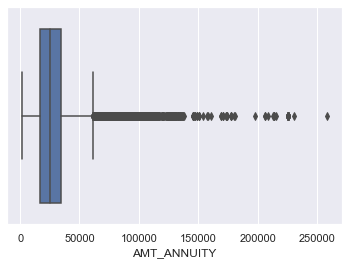

In [425]:
sns.boxplot(app_data_df.AMT_ANNUITY)
plt.show()

In [426]:
app_data_df['EXT_SOURCE_3'].isnull().mean()

0.1986759989115355

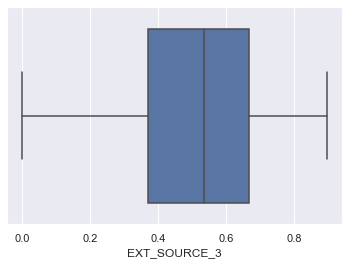

In [427]:
sns.boxplot(app_data_df['EXT_SOURCE_3'])
plt.show()

In [428]:
app_data_df['EXT_SOURCE_3'].describe()

count    179632.000000
mean          0.510775
std           0.194645
min           0.000527
25%           0.370650
50%           0.535276
75%           0.667458
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [429]:
EXT_SOURCE_3_mean= app_data_df['EXT_SOURCE_3'].mean()
EXT_SOURCE_3_mean

0.5107745897132728

In [430]:
df['EXT_SOURCE_3'] = app_data_df['EXT_SOURCE_3'].fillna(EXT_SOURCE_3_mean)

In [431]:
app_data_df['EXT_SOURCE_3'].isnull().sum()

44537

In [432]:
app_data_df['EXT_SOURCE_2'].isnull().mean()


0.002199233613925208

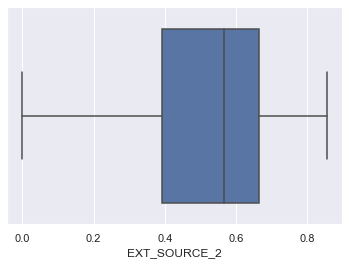

In [433]:
sns.boxplot(app_data_df['EXT_SOURCE_2'])
plt.show()

In [434]:
app_data_df['EXT_SOURCE_2'].describe()

count    2.236760e+05
mean     5.140596e-01
std      1.912998e-01
min      8.170000e-08
25%      3.915297e-01
50%      5.656660e-01
75%      6.637196e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [435]:
EXT_SOURCE_2_mean= app_data_df['EXT_SOURCE_2'].mean()
EXT_SOURCE_2_mean


0.5140596061725345

In [436]:
df['EXT_SOURCE_2'] = app_data_df['EXT_SOURCE_2'].fillna(EXT_SOURCE_2_mean)
df['EXT_SOURCE_2']

0         0.262949
1         0.622246
2         0.555912
3         0.650442
4         0.322738
            ...   
224164    0.597691
224165    0.685638
224166    0.099650
224167    0.434999
224168    0.531019
Name: EXT_SOURCE_2, Length: 223982, dtype: float64

In [437]:
df['EXT_SOURCE_2'].isnull().sum()

0

In [438]:
app_data_df['AMT_GOODS_PRICE'].isnull().mean()

0.0008341920604543893

In [439]:
app_data_df['AMT_GOODS_PRICE'].describe()

count    2.239820e+05
mean     5.384978e+05
std      3.695043e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [440]:
app_data_df['AMT_GOODS_PRICE'].describe().apply(lambda p: '%.2f' % p)

count     223982.00
mean      538497.78
std       369504.26
min        45000.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: object

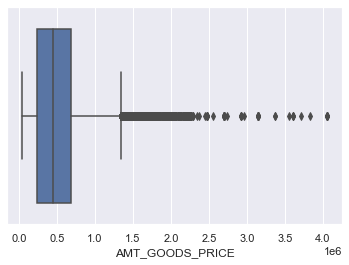

In [441]:
sns.boxplot(app_data_df.AMT_GOODS_PRICE)
plt.show()

In [442]:
df =app_data_df[~np.isnan(app_data_df['AMT_GOODS_PRICE'])]

In [443]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648,1,0,1,1,0,Laborers,2,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186,1,0,1,1,0,Core staff,1,School,0.622246,NaN,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260,1,1,1,1,0,Laborers,2,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833,1,0,1,0,0,Laborers,2,Business Entity Type 3,0.650442,NaN,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311,1,0,1,0,0,Core staff,2,Religion,0.322738,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [444]:
app_data_df.AMT_REQ_CREDIT_BUREAU_QRT.isnull().mean()*100

13.513019195339233

In [445]:
app_data_df.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    193877.000000
mean          0.264131
std           0.610464
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

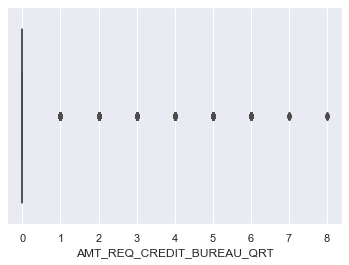

<Figure size 720x360 with 0 Axes>

In [446]:
sns.boxplot(app_data_df.AMT_REQ_CREDIT_BUREAU_QRT)
plt.figure(figsize = (10,5))
plt.show()

In [447]:
app_data_df.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0    156995
1.0     24762
2.0     10458
3.0      1250
4.0       330
5.0        47
6.0        24
7.0         6
8.0         5
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [448]:
mode_data_AMT_REQ_CREDIT_BUREAU_QRT = app_data_df.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0]
mode_data_AMT_REQ_CREDIT_BUREAU_QRT

0.0

In [449]:
df.AMT_REQ_CREDIT_BUREAU_QRT = app_data_df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(mode_data_AMT_REQ_CREDIT_BUREAU_QRT)

In [450]:
df.AMT_REQ_CREDIT_BUREAU_QRT 

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
224164    0.0
224165    0.0
224166    0.0
224167    0.0
224168    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, Length: 223982, dtype: float64

In [451]:
app_data_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.004015
AMT_GOODS_PRICE                 0.083419
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
OCCUPATION_TYPE                31.410677
REGION_RATING_CLIENT_W_CITY     0.000000
ORGANIZATION_TYPE               0.000000
EXT_SOURCE_2    

In [452]:
# Deleting AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK,
# AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
app_data_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()
mode_data_AMT_REQ_CREDIT_BUREAU_HOUR =app_data_df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0]
df.AMT_REQ_CREDIT_BUREAU_HOUR = app_data_df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(mode_data_AMT_REQ_CREDIT_BUREAU_HOUR)

In [453]:
app_data_df.AMT_REQ_CREDIT_BUREAU_HOUR

0         0.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
224164    0.0
224165    NaN
224166    0.0
224167    0.0
224168    NaN
Name: AMT_REQ_CREDIT_BUREAU_HOUR, Length: 224169, dtype: float64

In [454]:
app_data_df.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().mean() *100 

13.513019195339233

In [455]:
app_data_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()
mode_data_AMT_REQ_CREDIT_BUREAU_DAY = app_data_df.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0]
df.AMT_REQ_CREDIT_BUREAU_DAY = app_data_df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(mode_data_AMT_REQ_CREDIT_BUREAU_DAY )

In [456]:
df.AMT_REQ_CREDIT_BUREAU_DAY

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
224164    0.0
224165    0.0
224166    0.0
224167    0.0
224168    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, Length: 223982, dtype: float64

In [457]:
df.AMT_REQ_CREDIT_BUREAU_DAY.isnull().mean() *100 

0.0

In [458]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.mean()*100

189.56013607338465

In [459]:
df.AMT_REQ_CREDIT_BUREAU_MON .mean()*100

26.698981514461668

In [460]:
(app_data_df.isnull().mean()*100).sort_values(ascending = False).apply(lambda p: '%.2f' % p)

OCCUPATION_TYPE                31.41
EXT_SOURCE_3                   19.87
AMT_REQ_CREDIT_BUREAU_YEAR     13.51
AMT_REQ_CREDIT_BUREAU_QRT      13.51
AMT_REQ_CREDIT_BUREAU_MON      13.51
AMT_REQ_CREDIT_BUREAU_WEEK     13.51
AMT_REQ_CREDIT_BUREAU_DAY      13.51
AMT_REQ_CREDIT_BUREAU_HOUR     13.51
EXT_SOURCE_2                    0.22
AMT_GOODS_PRICE                 0.08
AMT_ANNUITY                     0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_7                 0.00
FLAG_DOCUMENT_15                0.00
FLAG_DOCUMENT_10                0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_13                0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_14                0.00
FLAG_DOCUMENT_16                0.00
FLAG_DOCUMENT_12                0.00
FLAG_DOCUMENT_17                0.00
F

## Handling Outliers:

#Outliers are the values that are much beyond or far from the next nearest data points or we can say that outliers is a value in a dataset that is extremely distinct from most of other values.

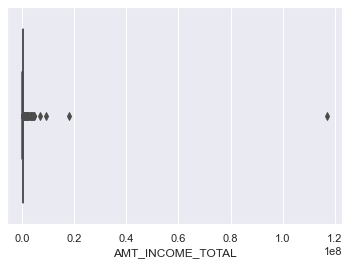

In [461]:
#This  varibale indictes the Income of the client.
#as we can see from the plot there is one value which is too high compared to others.
#hence it is an outlier


sns.boxplot(app_data_df.AMT_INCOME_TOTAL)
plt.show()

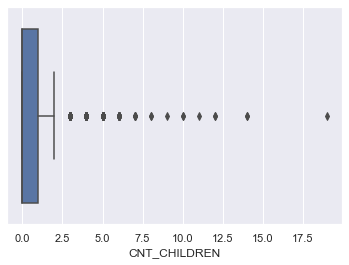

In [462]:
#This variable indiactes Number of children the client has.
#As we see from the plot some values are as high as 19, which is not possible in general case scenario. 
#hence an outlier

sns.boxplot(app_data_df.CNT_CHILDREN)
plt.show()

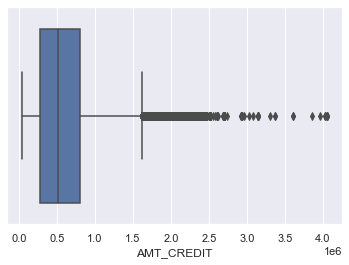

In [463]:
#This variable indicates Credit amount of the loan
#as we can see from the graph there are few outliers.
#we will check these values to confirm.


sns.boxplot(app_data_df.AMT_CREDIT)
plt.show()

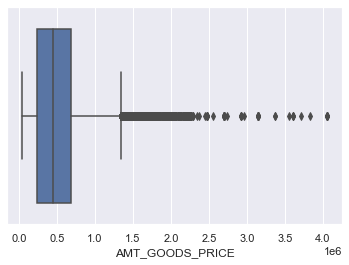

In [464]:
sns.boxplot(app_data_df.AMT_GOODS_PRICE)
plt.show()

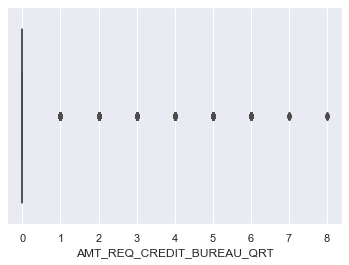

In [465]:
#This variable indicates the  Number of enquiries to Credit Bureau about the client 3 month
#before application (excluding one month before application)
#as we can see from the plot below there is one outlier.

sns.boxplot(app_data_df['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

## DATA IMBALANCE

0    91.89
1     8.11
Name: TARGET, dtype: float64


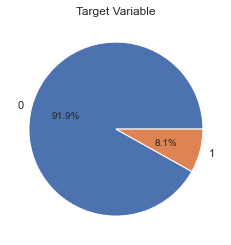

In [466]:
#Target Variable
y=round(app_data_df["TARGET"].value_counts(normalize=True)*100,2)
print(y)
plt.pie(y,labels=y.index,autopct='%1.1f%%')
plt.title("Target Variable")
plt.show()

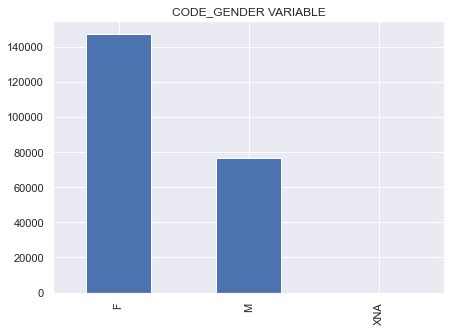

In [467]:
#CODE_GENDER variable
plt.figure(figsize=(7,5))
app_data_df.CODE_GENDER.value_counts().plot(kind = 'bar')
plt.title('CODE_GENDER VARIABLE')
plt.show()

In [468]:
app_data_df.CODE_GENDER.value_counts(normalize = True)*100

F      65.793219
M      34.204997
XNA     0.001784
Name: CODE_GENDER, dtype: float64

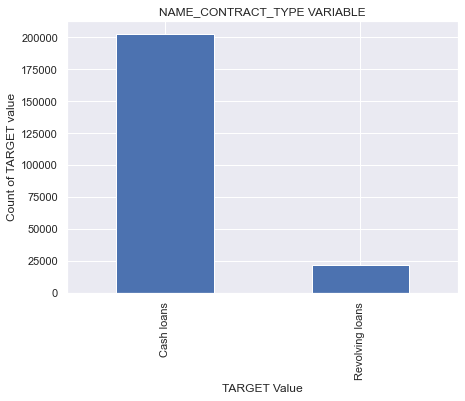

In [469]:
#NAME_CONTRACT_TYPE variable
plt.figure(figsize=(7,5))
app_data_df.NAME_CONTRACT_TYPE.value_counts().plot(kind = 'bar')
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET value")
plt.title('NAME_CONTRACT_TYPE VARIABLE')
plt.show()


In [470]:
app_data_df['TARGET'].value_counts()

0    205992
1     18177
Name: TARGET, dtype: int64

In [471]:
# creating new datadrame for target=0
df_0 =app_data_df[app_data_df['TARGET']==0]
df_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186,1,0,1,1,0,Core staff,1,School,0.622246,NaN,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260,1,1,1,1,0,Laborers,2,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833,1,0,1,0,0,Laborers,2,Business Entity Type 3,0.650442,NaN,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311,1,0,1,0,0,Core staff,2,Religion,0.322738,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,-16941,-1588,-4970,1,1,1,1,0,Laborers,2,Other,0.354225,0.621226,-2536.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [472]:
#checking the shape of new dataframe
df_0.shape

(205992, 53)

In [473]:
# creating new datadrame for target=0
df_1 = app_data_df[app_data_df['TARGET']==1]
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648,1,0,1,1,0,Laborers,2,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,-18724,-2628,-6573,1,0,1,0,0,Cooking staff,2,Business Entity Type 3,0.548477,0.190706,-161.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17482,-1262,-1182,1,0,1,0,0,Laborers,2,Business Entity Type 3,0.306841,0.320163,-1075.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13384,-3597,-45,1,1,1,1,0,Sales staff,3,Self-employed,0.674203,0.399676,-1480.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24794,365243,-5391,0,0,1,0,0,NaN,2,XNA,0.023952,0.720944,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [474]:
df_1.shape

(18177, 53)

In [475]:
#  Getting the ratio of df_0 : df_1
ratio = df_0.shape[0]/df_1.shape[0]
ratio

11.332563129229246

####Ratio of 0:1 =11.33:1
#This is an imbalanced datasest as it clearly indictes that for every 1 there is most number of 0's

## Correlation

#### Getting numerical columns from the application data



In [476]:
application_num_data=app_data_df.select_dtypes(include=np.number)

In [477]:
application_num_data.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [478]:
num_data=application_num_data.columns.tolist()[2:16] + application_num_data.columns.tolist()[18:26]
num_data

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT_W_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8']

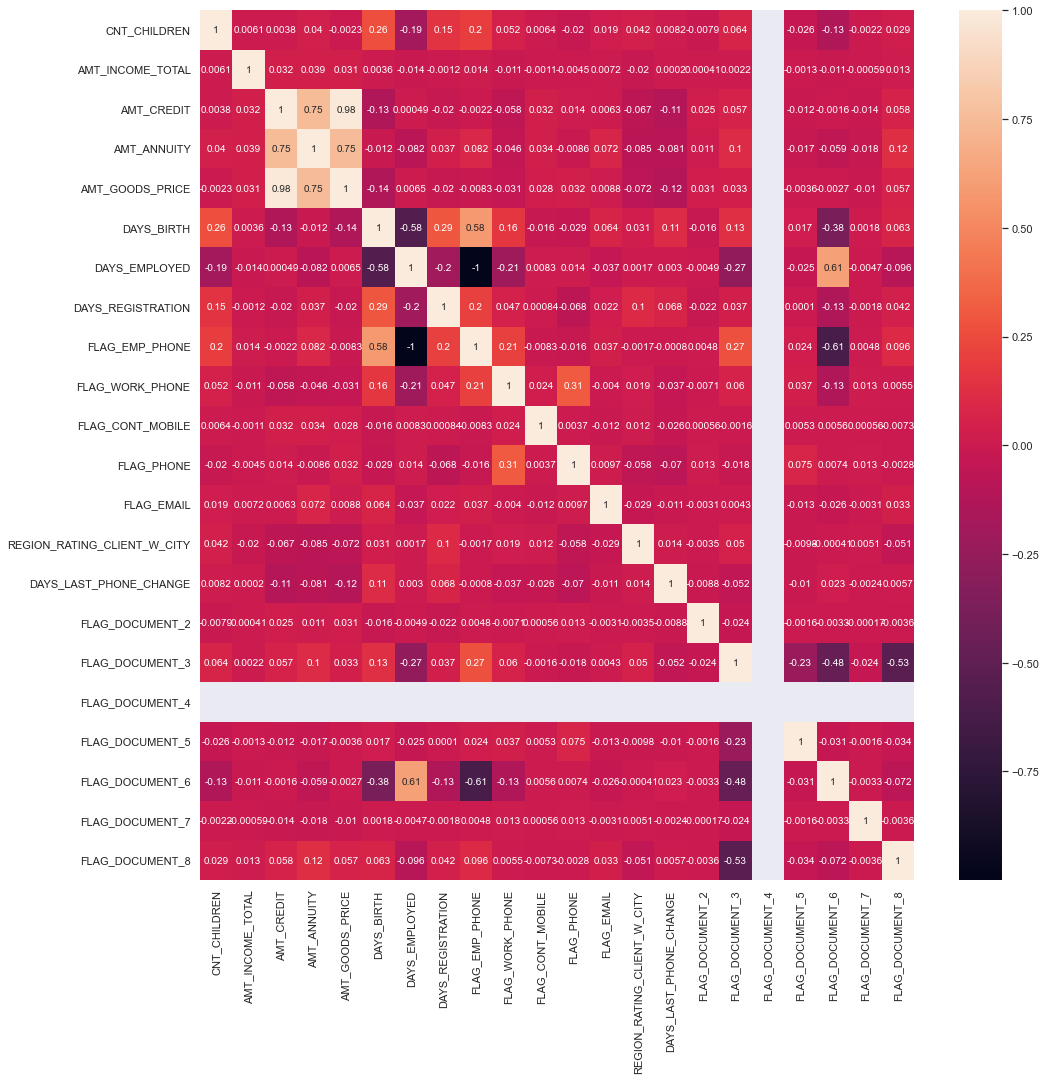

In [479]:
# Correlation of target variables with value 1
target_1=app_data_df.loc[app_data_df.TARGET==1]
plt.subplots(figsize=(16,16))
sns.heatmap((target_1[num_data].corr()),annot=True)
plt.show()

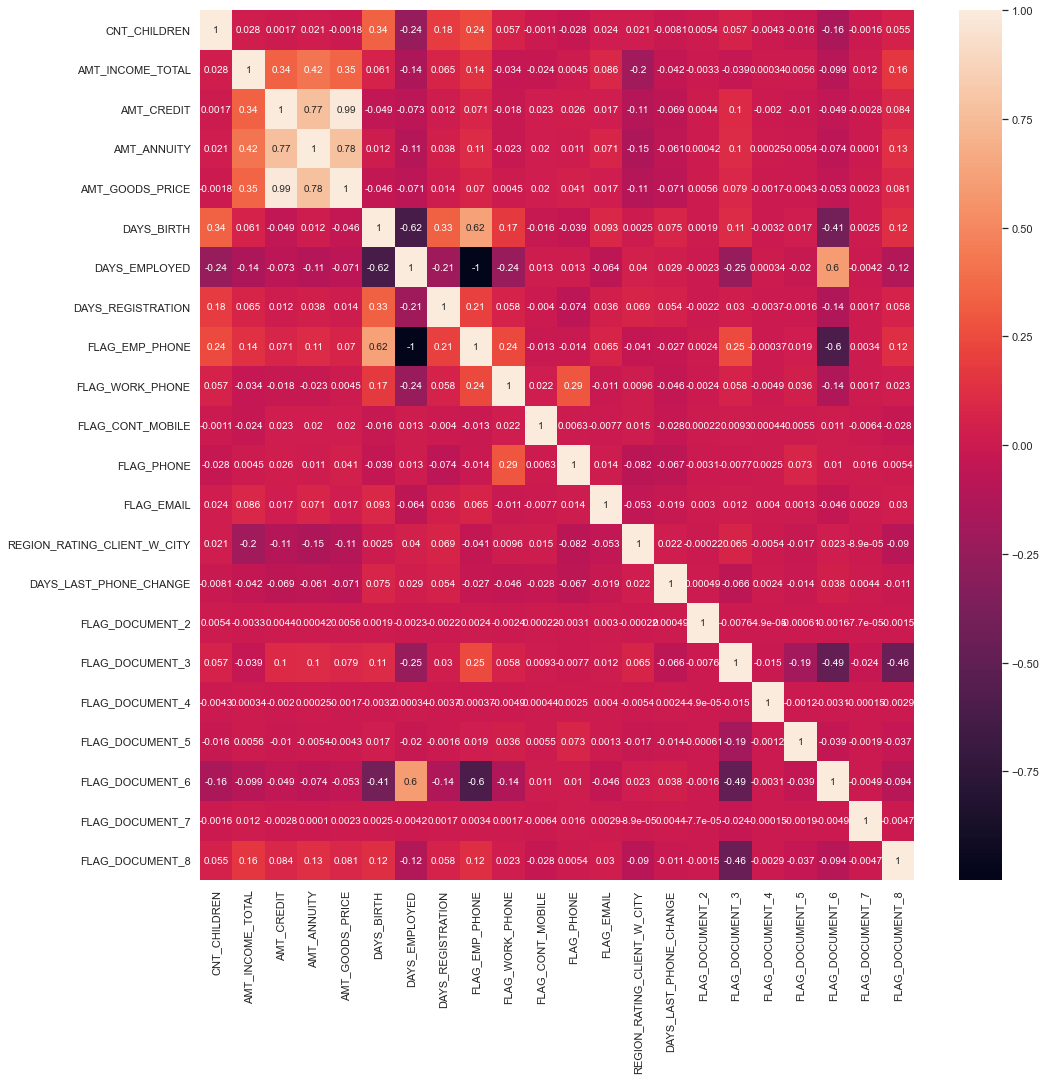

In [480]:
# Corelation of target variables with value 0
target_0=app_data_df.loc[app_data_df.TARGET==0]
plt.subplots(figsize=(16,16))
sns.heatmap((target_0[num_data].corr()),annot=True)
plt.show()

#We can easily find cash loans  are more than the Revolving Loans.


Working                 51.645410
Commercial associate    23.277527
Pensioner               18.015872
State servant            7.042008
Unemployed               0.008476
Student                  0.006245
Businessman              0.003123
Maternity leave          0.001338
Name: NAME_INCOME_TYPE, dtype: float64 

Secondary / secondary special    71.054874
Higher education                 24.328520
Incomplete higher                 3.333646
Lower secondary                   1.229876
Academic degree                   0.053085
Name: NAME_EDUCATION_TYPE, dtype: float64 

Married                 64.004836
Single / not married    14.716575
Civil marriage           9.649862
Separated                6.413465
Widow                    5.214370
Unknown                  0.000892
Name: NAME_FAMILY_STATUS, dtype: float64 

Married                 64.004836
Single / not married    14.716575
Civil marriage           9.649862
Separated                6.413465
Widow                    5.214370
Unknown    

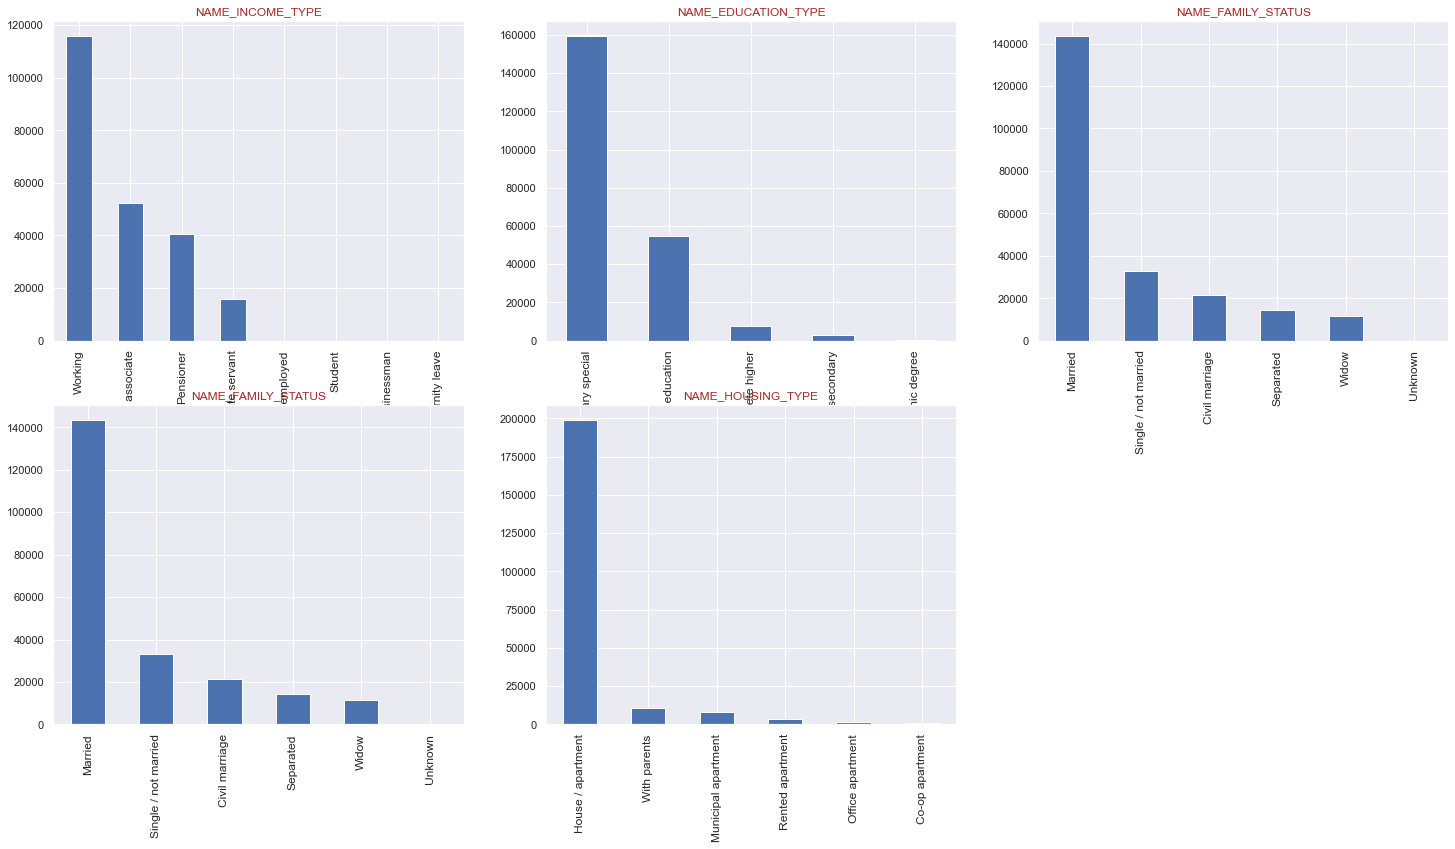

In [481]:
var_list = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
list = 0
plt.figure(figsize = (25,20))
for var1 in var_list:
    list+= 1
    plt.subplot(3,3,list)
    plt.title(var1, color = 'brown')
    app_data_df[var1].value_counts().plot(kind = 'bar')
    print(app_data_df[var1].value_counts(normalize=True)*100,"\n")
    plt.xticks(rotation= 90, fontsize = 12)

In [482]:
# NAME_INCOME_TYPE: Working, Commercial associate and Pensioner having higher percentage of applicants.
#NAME_EDUCATION_TYPE: Most of the loans are provided either for Secondary or Higher education purposes.
#NAME_FAMILY_STATUS: Most of applicants are married
#NAME_HOUSING_TYPE: The applicants are staying mostly in their own house or else in apratments.

In [483]:
categorical_cols = ['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','ORGANIZATION_TYPE','OCCUPATION_TYPE','NAME_CONTRACT_STATUS']
print(len(categorical_cols))
continious_data_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED',
              'EXT_SOURCE_2', 'EXT_SOURCE_3']
print(len(continious_data_cols))

12
7


##### I have taken this variables to extract some details from these columns

# Univariate Analysis

In [484]:
#Some univariate analysis on categorcal_cols 

F      147488
M       76677
XNA         4
Name: CODE_GENDER, dtype: int64


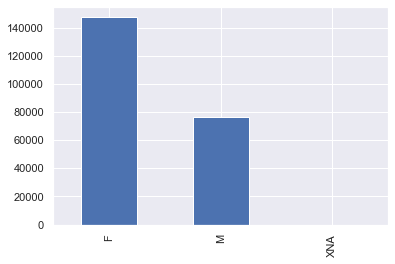

In [485]:
print(app_data_df.CODE_GENDER.value_counts())

app_data_df.CODE_GENDER.value_counts().plot.bar()
plt.show()

In [486]:
#undoubtedly females are more than male

In [487]:
#Let's us find the list of defaulters who are unable to pay their loan

In [488]:
list = app_data_df[(app_data_df.TARGET == 1)]
list.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648,1,0,1,1,0,Laborers,2,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,-18724,-2628,-6573,1,0,1,0,0,Cooking staff,2,Business Entity Type 3,0.548477,0.190706,-161.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17482,-1262,-1182,1,0,1,0,0,Laborers,2,Business Entity Type 3,0.306841,0.320163,-1075.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13384,-3597,-45,1,1,1,1,0,Sales staff,3,Self-employed,0.674203,0.399676,-1480.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24794,365243,-5391,0,0,1,0,0,NaN,2,XNA,0.023952,0.720944,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [489]:
#Now let's find the list of non-defaulters who are able to their loan

In [490]:
list_1 = app_data_df[(app_data_df.TARGET == 0)]
list_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186,1,0,1,1,0,Core staff,1,School,0.622246,NaN,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260,1,1,1,1,0,Laborers,2,Government,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833,1,0,1,0,0,Laborers,2,Business Entity Type 3,0.650442,NaN,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311,1,0,1,0,0,Core staff,2,Religion,0.322738,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,-16941,-1588,-4970,1,1,1,1,0,Laborers,2,Other,0.354225,0.621226,-2536.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [491]:

#Let's check who pay loan  and who are better loan repayer between men and women and who are defaulters.

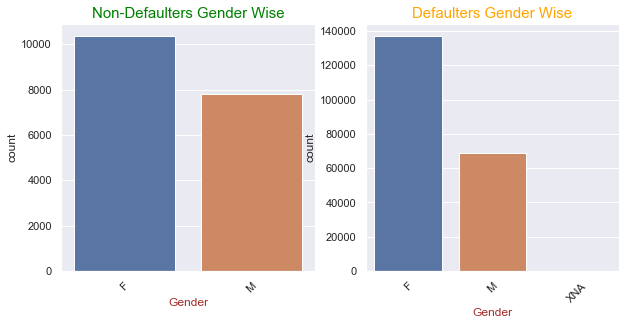

In [613]:
#CODE_GENDER
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(list.CODE_GENDER,order=list.CODE_GENDER.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Gender', color = 'brown', loc = 'center' )
plt.title("Non-Defaulters Gender Wise",color ='green', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(list_1.CODE_GENDER,order=list_1.CODE_GENDER.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Gender', color = 'brown', loc = 'center' )
plt.title("Defaulters Gender Wise", color ='orange', fontsize = 15)
sns.set(rc={'axes.facecolor':'pink', 'figure.facecolor':'pink'})
plt.show()

In [493]:
#It's clearly visible who pay their loan i.e. who are defaulters and who are non-defaulters

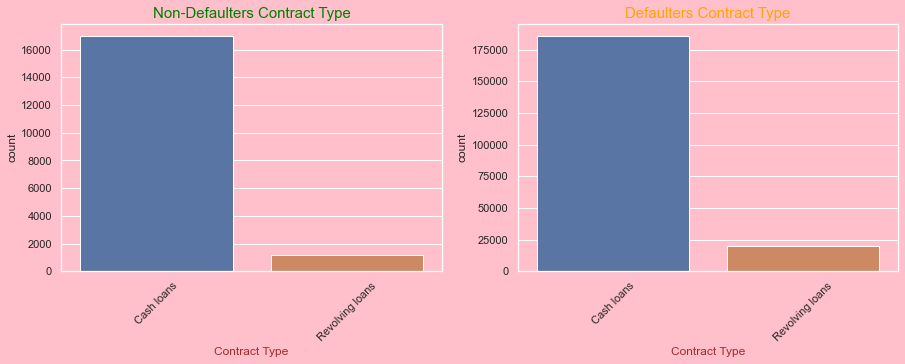

In [625]:
#NAME_CONTRACT_TYPE
#Nearly all opt for the cah loans contract type by both defaulter and non-defaulters.

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(list.NAME_CONTRACT_TYPE,order=list.NAME_CONTRACT_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Contract Type', color = 'brown', loc = 'center' )
plt.title("Non-Defaulters Contract Type",color ='green', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(list_1.NAME_CONTRACT_TYPE,order=list_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Contract Type', color = 'brown', loc = 'center' )
plt.title("Defaulters Contract Type", color ='orange', fontsize = 15)
plt.show()

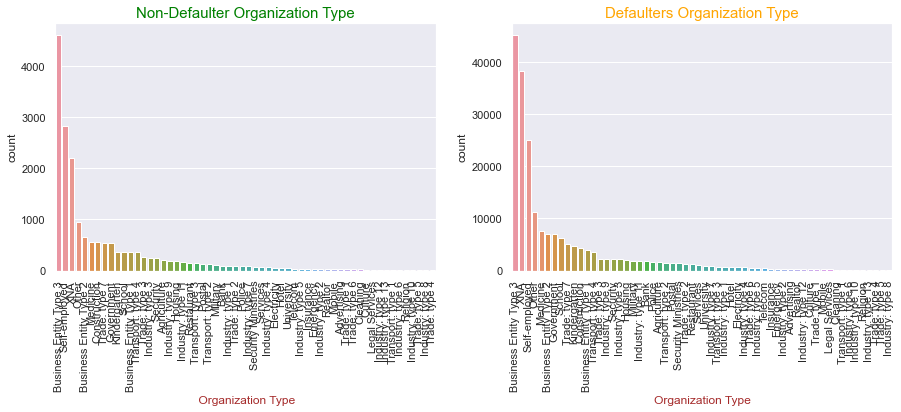

In [629]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(list.ORGANIZATION_TYPE,order=list.ORGANIZATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = ' Organization Type', color = 'brown', loc = 'center' )
plt.title("Non-Defaulter Organization Type",color ='green', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(list_1.ORGANIZATION_TYPE,order=list_1.ORGANIZATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Organization Type', color = 'brown', loc = 'center' )
plt.title("Defaulters Organization Type", color ='orange', fontsize = 15)
plt.show()

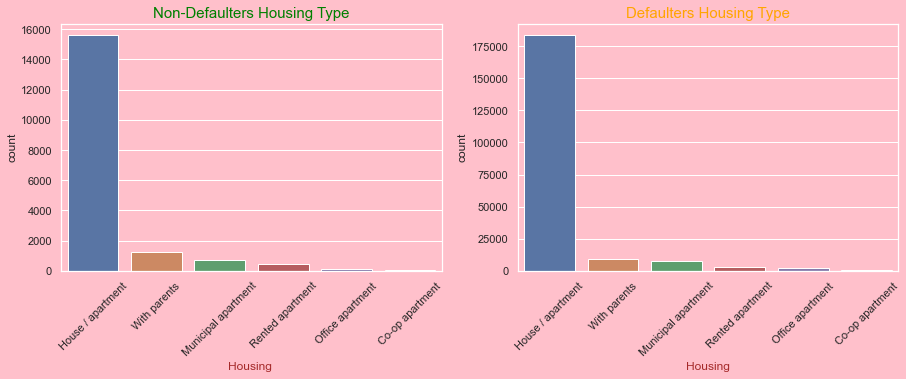

In [496]:
#NAME_HOUSING_TYPE
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(list.NAME_HOUSING_TYPE,order=list.NAME_HOUSING_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Housing ', color = 'brown', loc = 'center' )
plt.title("Non-Defaulters Housing Type",color ='green', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(list_1.NAME_HOUSING_TYPE,order=list_1.NAME_HOUSING_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Housing', color = 'brown', loc = 'center' )
plt.title("Defaulters Housing Type", color ='orange', fontsize = 15)
plt.show()

#### Most of the Defaulters are having their own house/apartment.

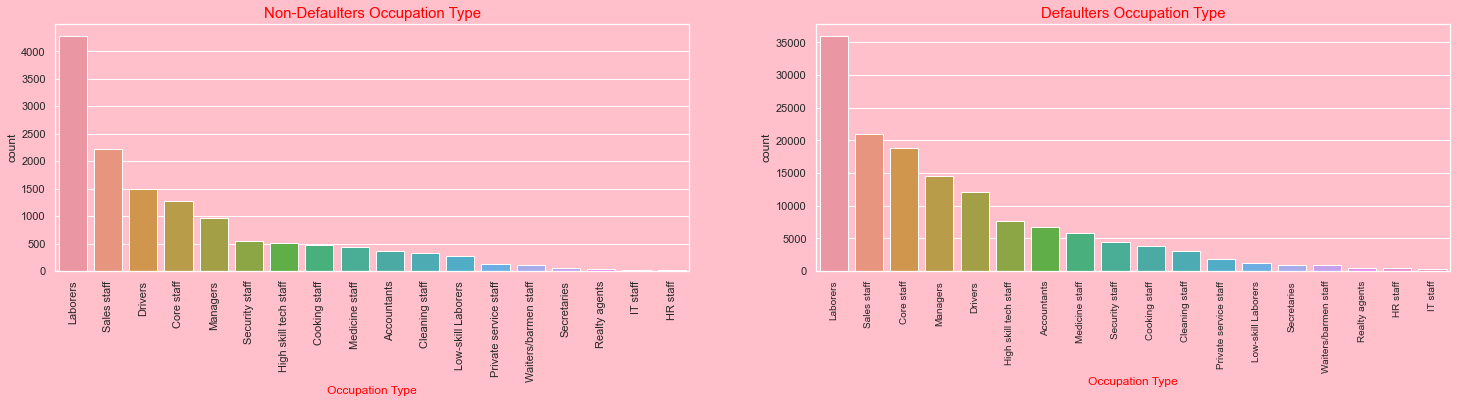

In [624]:
#OCCUPATION_TYPE
plt.figure(figsize=(25,10))
plt.subplot(2,2,1)
sns.countplot(list.OCCUPATION_TYPE,order=list.OCCUPATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Occupation Type', color = 'red', loc = 'center' )
plt.title("Non-Defaulters Occupation Type",color ='red', fontsize = 15)

plt.subplot(2,2,2)
sns.countplot(list_1.OCCUPATION_TYPE,order=list_1.OCCUPATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90, fontsize = 10)
plt.xlabel(xlabel = 'Occupation Type', color = 'red', loc = 'center' )
plt.title("Defaulters Occupation Type", color ='red', fontsize = 15)
plt.show()

#### Most of the defaulters are labours by their occupation. The labours are the one who is lower skilled people so, they are struggling with the loan bill payment and becoming defaulters.

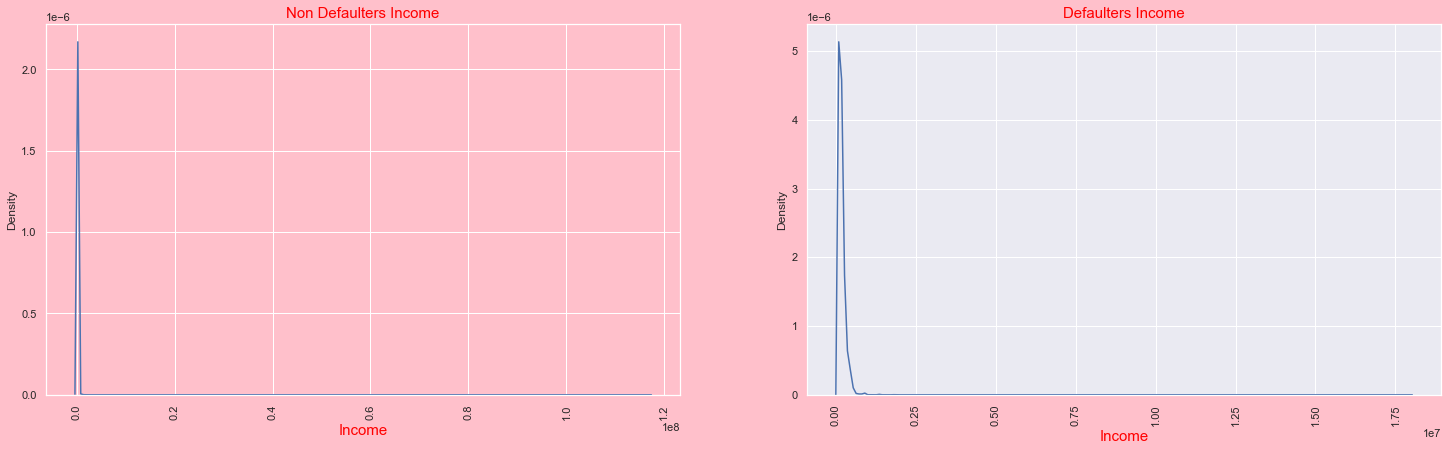

In [626]:
#INCOME TYPE
plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
sns.distplot(list.AMT_INCOME_TOTAL, hist = False)
plt.title('Non Defaulters Income', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Income', fontsize = 15,color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")


plt.subplot(2,2,2)
sns.distplot(list_1.AMT_INCOME_TOTAL, hist = False, kde = True)
plt.title('Defaulters Income', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Income', fontsize = 15, color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")
plt.show()

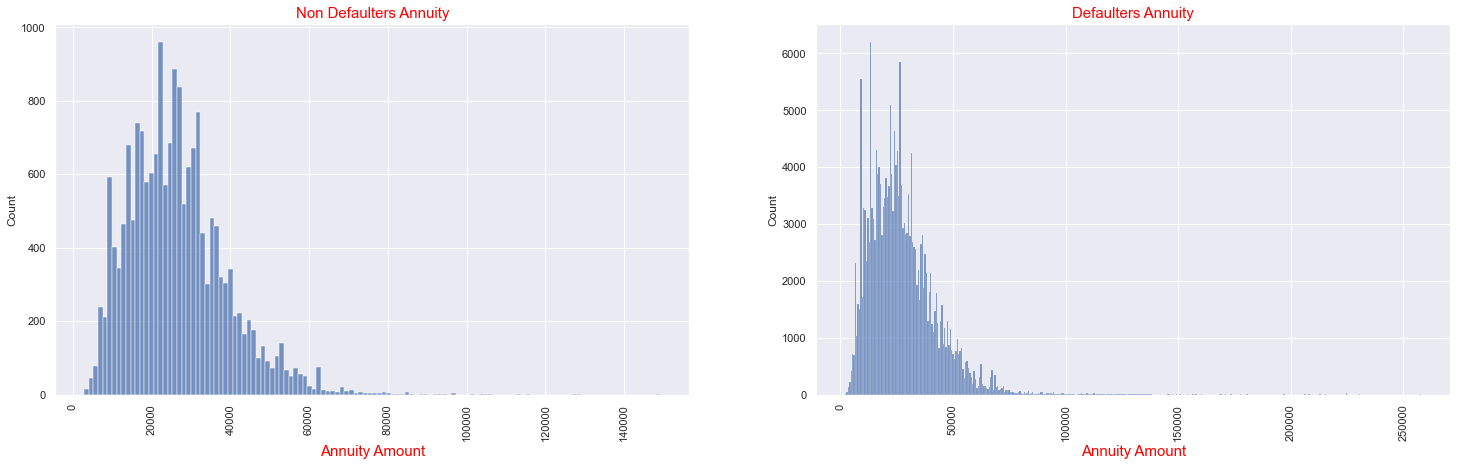

In [499]:
plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
sns.histplot(list.AMT_ANNUITY)
plt.title('Non Defaulters Annuity', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Annuity Amount', fontsize = 15,color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")


plt.subplot(2,2,2)
sns.histplot(list_1.AMT_ANNUITY)
plt.title('Defaulters Annuity', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Annuity Amount', fontsize = 15, color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")
plt.show()

#### Defaulters are having loan annuity between 15000 to 30000.

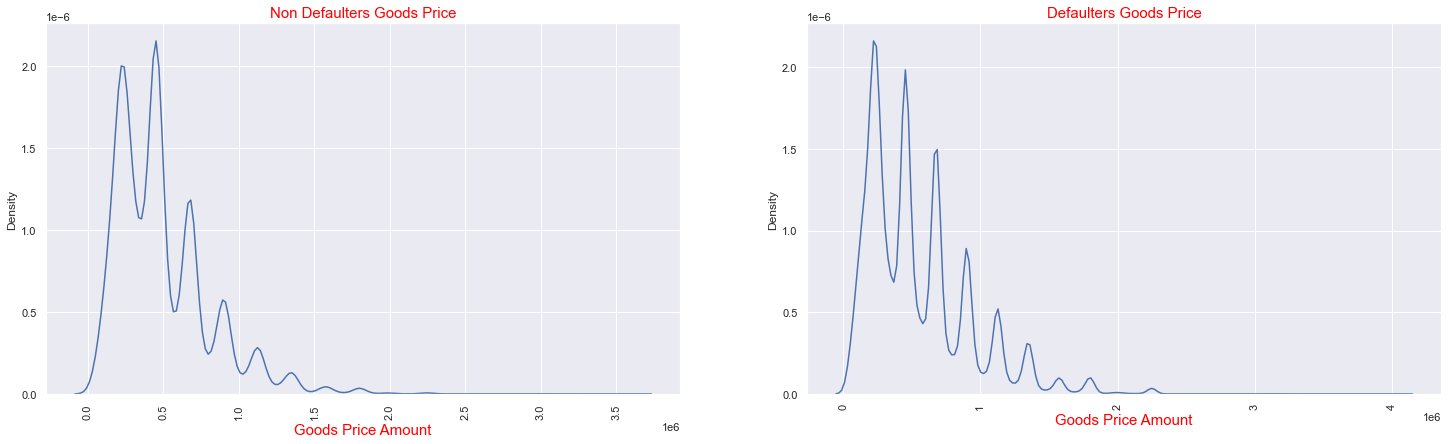

In [500]:
#AMT_GOODS_PRICE

plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
sns.kdeplot(list.AMT_GOODS_PRICE)
plt.title('Non Defaulters Goods Price', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Goods Price Amount', fontsize = 15,color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")


plt.subplot(2,2,2)
sns.kdeplot(list_1.AMT_GOODS_PRICE)
plt.title('Defaulters Goods Price', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'Goods Price Amount', fontsize = 15, color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")
plt.show()

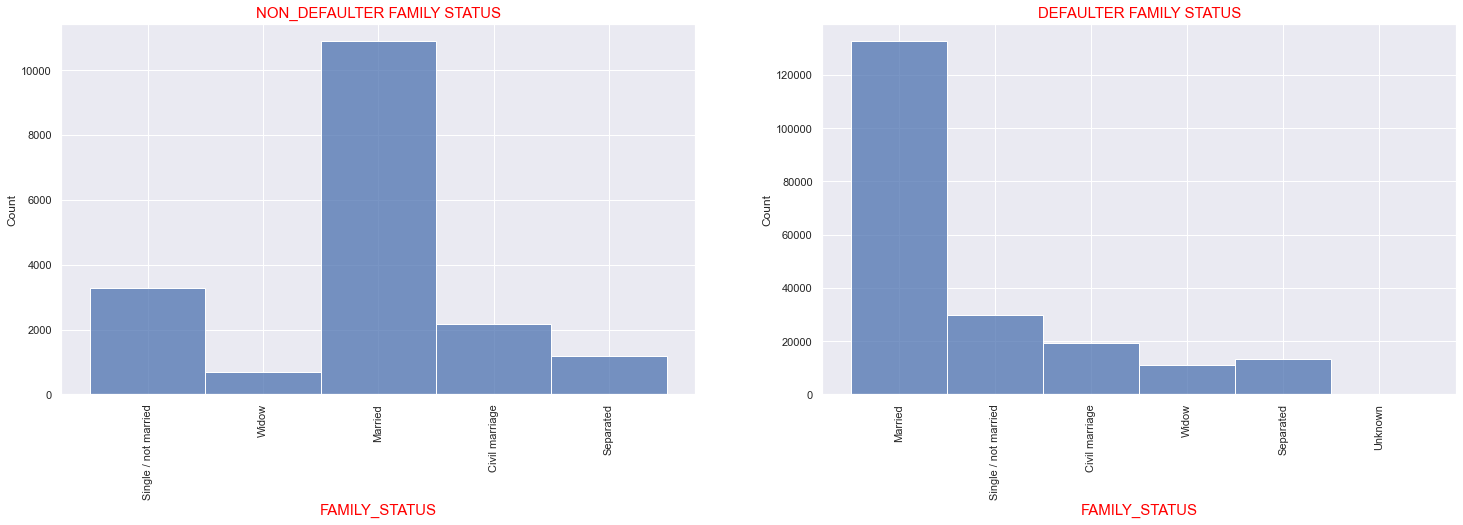

In [501]:
plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
sns.histplot(list. NAME_FAMILY_STATUS )
plt.title('NON_DEFAULTER FAMILY STATUS', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'FAMILY_STATUS', fontsize = 15,color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")


plt.subplot(2,2,2)
sns.histplot(list_1.NAME_FAMILY_STATUS)
plt.title('DEFAULTER FAMILY STATUS', fontsize = 15, color = 'red')
plt.xlabel(xlabel = 'FAMILY_STATUS', fontsize = 15, color = 'red', loc = 'center')
plt.xticks(rotation=90)
sns.set_style("darkgrid")
plt.show()

##### We can easily find here that mostly married are defaulters and non-defaulters


# Bivariate Analysis

In [502]:
print(continious_data_cols,'\n')
print(categorical_cols)

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'EXT_SOURCE_3'] 

['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'NAME_CONTRACT_STATUS']


In [503]:
corr_for_defaulters = list_1[continious_data_cols]
corr_for_defaulters.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3
1,270000.0,1293502.5,35698.5,1129500.0,-1188,0.622246,NaN
2,67500.0,135000.0,6750.0,135000.0,-225,0.555912,0.729567
3,135000.0,312682.5,29686.5,297000.0,-3039,0.650442,NaN
4,121500.0,513000.0,21865.5,513000.0,-3038,0.322738,NaN
5,99000.0,490495.5,27517.5,454500.0,-1588,0.354225,0.621226


In [504]:
corr_for_defaulters.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3
AMT_INCOME_TOTAL,1.000000,0.343149,0.420584,0.349961,-0.141266,0.140151,-0.071115
AMT_CREDIT,0.343149,1.000000,0.771278,0.987196,-0.072772,0.129574,0.037294
AMT_ANNUITY,0.420584,0.771278,1.000000,0.776773,-0.107433,0.127482,0.028993
AMT_GOODS_PRICE,0.349961,0.987196,0.776773,1.000000,-0.070965,0.136235,0.040166
DAYS_EMPLOYED,-0.141266,-0.072772,-0.107433,-0.070965,1.000000,-0.030312,0.110551
EXT_SOURCE_2,0.140151,0.129574,0.127482,0.136235,-0.030312,1.000000,0.085801
EXT_SOURCE_3,-0.071115,0.037294,0.028993,0.040166,0.110551,0.085801,1.000000


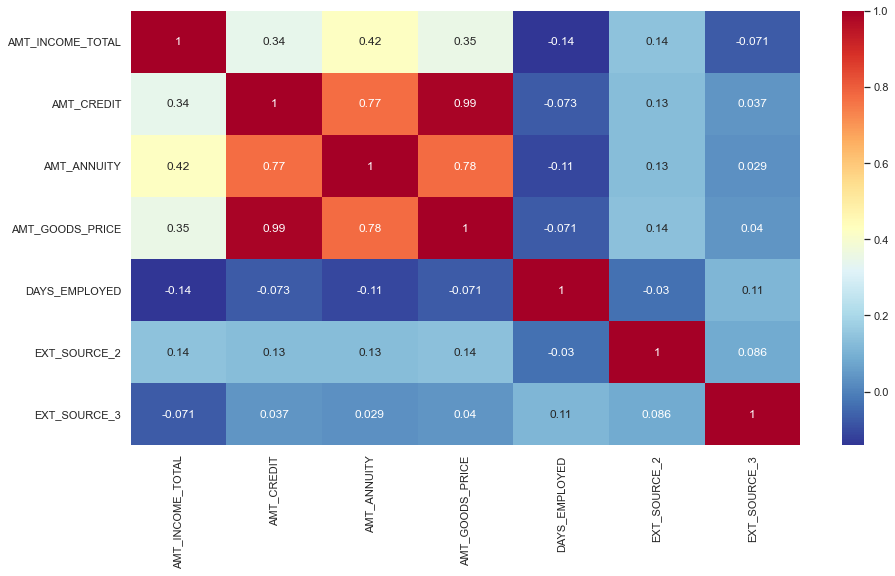

In [505]:
plt.figure(figsize = (15,8))
sns.heatmap(corr_for_defaulters.corr(), cmap = 'RdYlBu_r', annot = True)
plt.show()


In [506]:
#After analysis
#The more the correlated percentage means the high value for being a defaulter.
#0.98% = AMT_CREDIT & AMT_GOODS_PRICE.
#0.75% = AMT_CREDIT & AMT_ANNUITY.
#0.75% = AMT_GOODS_PRICE & AMT_ANNUITY.
#0.58% = Age & DAYS_EMPLOYED


In [507]:
corr_for_defaulters = list[continious_data_cols]
corr_for_defaulters.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3
0,202500.0,406597.5,24700.5,351000.0,-637,0.262949,0.139376
26,112500.0,979992.0,27076.5,702000.0,-2628,0.548477,0.190706
40,202500.0,1193580.0,35028.0,855000.0,-1262,0.306841,0.320163
42,135000.0,288873.0,16258.5,238500.0,-3597,0.674203,0.399676
81,81000.0,252000.0,14593.5,252000.0,365243,0.023952,0.720944


In [508]:
corr_for_defaulters.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3
AMT_INCOME_TOTAL,1.000000,0.032371,0.038993,0.031497,-0.013980,0.003067,-0.015866
AMT_CREDIT,0.032371,1.000000,0.750010,0.983063,0.000493,0.121150,0.079269
AMT_ANNUITY,0.038993,0.750010,1.000000,0.750984,-0.082318,0.118336,0.044927
AMT_GOODS_PRICE,0.031497,0.983063,0.750984,1.000000,0.006534,0.131818,0.080190
DAYS_EMPLOYED,-0.013980,0.000493,-0.082318,0.006534,1.000000,-0.001325,0.107514
EXT_SOURCE_2,0.003067,0.121150,0.118336,0.131818,-0.001325,1.000000,0.074111
EXT_SOURCE_3,-0.015866,0.079269,0.044927,0.080190,0.107514,0.074111,1.000000


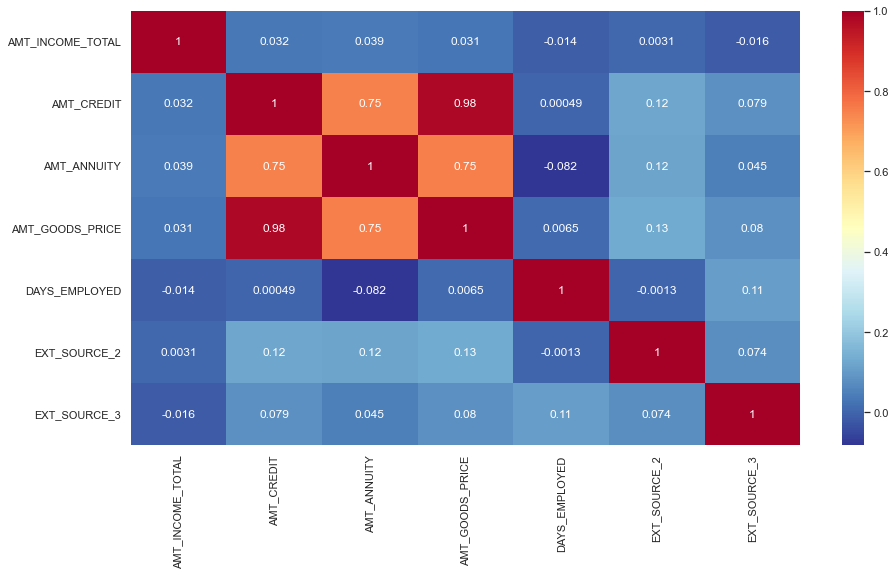

In [509]:
plt.figure(figsize = (15,8))
sns.heatmap(corr_for_defaulters.corr(), cmap = 'RdYlBu_r', annot = True)
plt.show()


##### I have taken the Non-defaulter dataframe here.
The more the correlated percentage means the high value for being a Non-defaulter.
0.99% = AMT_CREDIT & AMT_GOODS_PRICE.
0.77% = AMT_CREDIT & AMT_ANNUITY.
0.77% = AMT_GOODS_PRICE & AMT_ANNUITY.
0.63% = Age & DAYS_EMPLOYED
We  come to conclusion that there is a similarity between columns when it comes to default and non-default data correlation. The column relation which are hsowing higher percentage of correlation in Non-defaulters are the one showing in defaulters correlation.



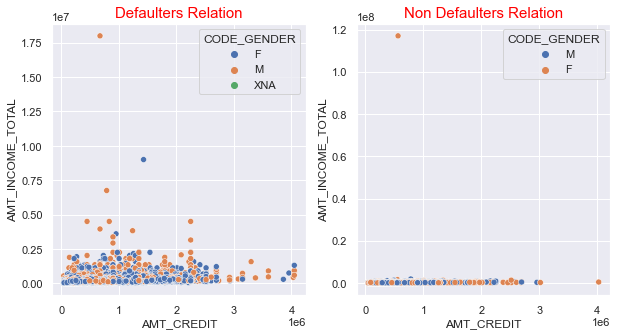

In [510]:
# We will do scatter plot analysis

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.scatterplot(x = list_1.AMT_CREDIT,y = list_1.AMT_INCOME_TOTAL, hue = list_1.CODE_GENDER, data = list_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)

plt.subplot(1,2,2)
sns.scatterplot(x = list.AMT_CREDIT,y = list.AMT_INCOME_TOTAL, hue = list.CODE_GENDER, data = list)
plt.title("Non Defaulters Relation", color = 'red', fontsize = 15)
plt.show()

##### For Non-Defaulters: The values are evenly distributed AMT_CREDIT and AMT_INCOME_TOTAL. There no distinguish between Male and female. its looks like all are having same ratio in this plot. So, Its hard to figure it out here.
For Defaulters: There are more congested values in initial or lower areas of both AMT_CREDIT and AMT_INCOME_TOTAL. With the Income the LOAN value also increses.

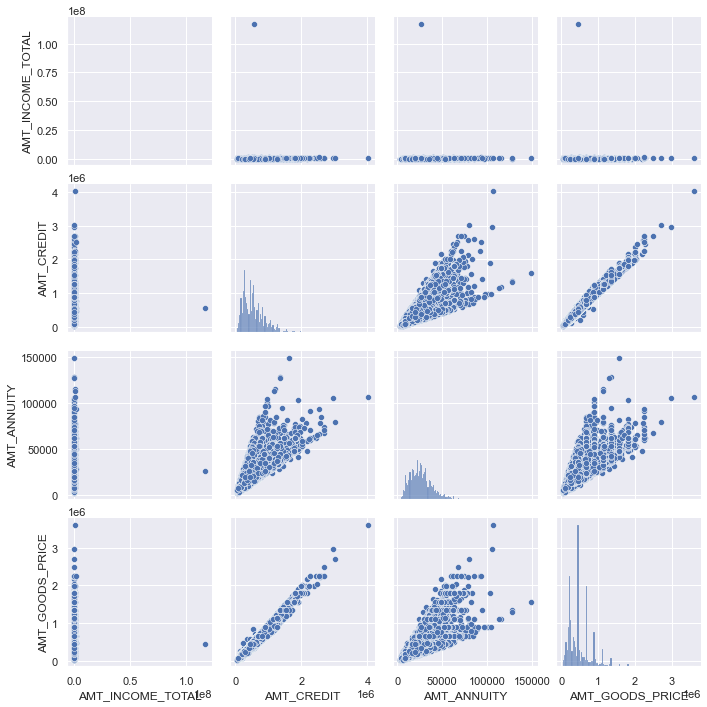

In [511]:
# Pair plots between variables and checking for Non-Defaulters

sns.pairplot(list[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']])
plt.show()


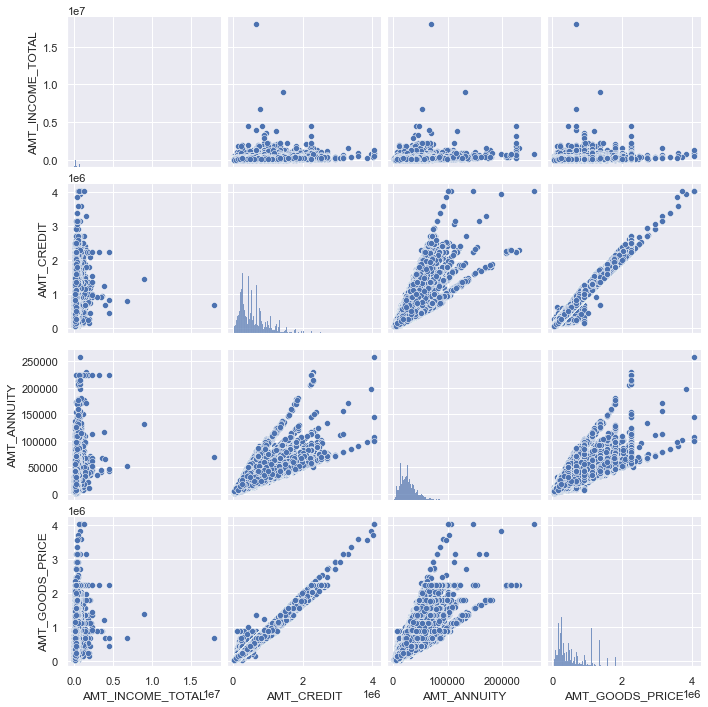

In [512]:
#Pair Plots for Defaulters

sns.pairplot(list_1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']])
plt.show()


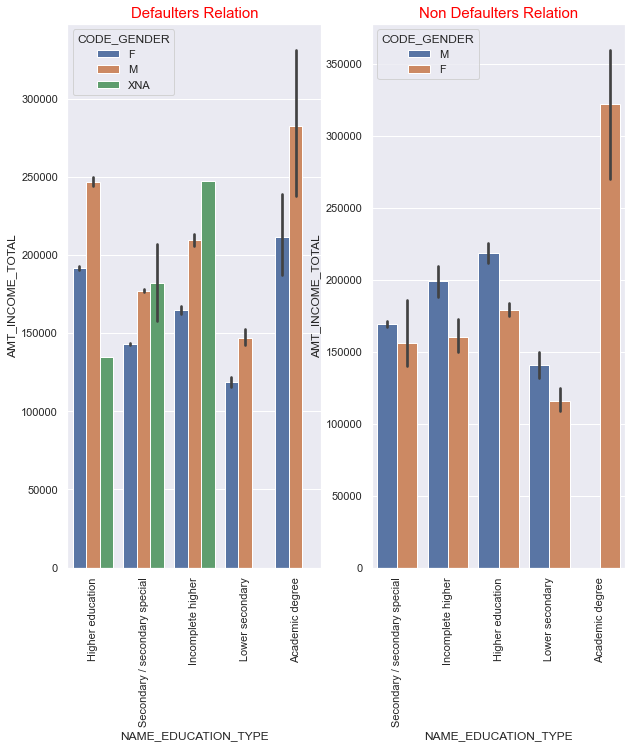

In [513]:
#EDUCATION_TYPE & CODE_GENDER & AMT_INCOME_TOTAL
# We will do scatter plot else we can do line plot as well for this analysis

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
sns.barplot(x = list_1.NAME_EDUCATION_TYPE,y = list_1.AMT_INCOME_TOTAL, hue = list_1.CODE_GENDER, data = list_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x = list.NAME_EDUCATION_TYPE,y = list.AMT_INCOME_TOTAL, hue = list.CODE_GENDER, data = list)
plt.title("Non Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [614]:
#Defaulters: Female Academic Degree holders are earning more but still there in defaulter list more. Where as not single Academic male holders are in defaulter list.
#But for rest of the education type we can see that males are earning more as well being the more defaulters.

#Non Defaulters: Here also Female Academic degree holders are more and they are in high no when it comes to non defaulters. Nearly same amount non defaulter are there for guys who studied Higher education. Applied to both male and female. Female in all educational aspects are more non-defaulters than male.


In [615]:
#.NAME_CONTRACT_TYPE & CODE_GENDER
app_data_df.pivot_table(values = 'TARGET', index = 'NAME_CONTRACT_TYPE', columns = 'CODE_GENDER',aggfunc = 'mean')


CODE_GENDER,F,M,XNA
NAME_CONTRACT_TYPE,,,
Cash loans,0.072046,0.106249,NaN
Revolving loans,0.053779,0.058598,0.0


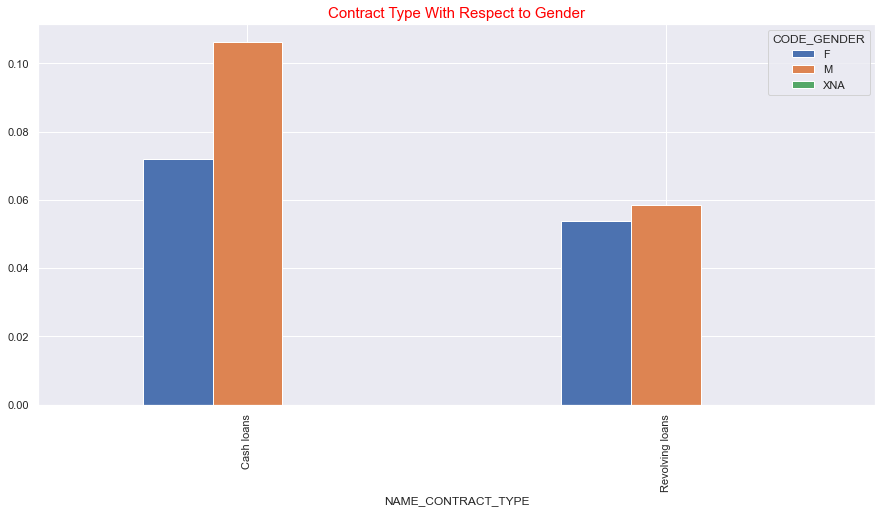

In [516]:
app_data_df.pivot_table(values = 'TARGET', index = 'NAME_CONTRACT_TYPE', columns = 'CODE_GENDER', aggfunc = 'mean').plot.bar(figsize = (15,7))
plt.title('Contract Type With Respect to Gender', color = 'red', fontsize = 15)
plt.show()

In [616]:
#cashloans by males are more comapred to female and they are defaulters as well.
#Revolving loans are also taken by male more and they are most defaulters.

In [617]:
#.NAME_INCOME_TYPE & GENDER & TARGET
app_data_df.pivot_table(values = 'TARGET', index = 'NAME_INCOME_TYPE', columns = 'CODE_GENDER',aggfunc = 'mean')

CODE_GENDER,F,M,XNA
NAME_INCOME_TYPE,,,
Businessman,0.000000,0.000000,NaN
Commercial associate,0.066776,0.088808,0.0
Maternity leave,0.500000,0.000000,NaN
Pensioner,0.050117,0.074633,NaN
State servant,0.054846,0.070778,NaN
Student,0.000000,0.000000,NaN
Unemployed,0.375000,0.333333,NaN
Working,0.083754,0.115024,0.0


In [ ]:
app_data_df.pivot_table(values = 'TARGET', index = 'NAME_INCOME_TYPE', columns = 'CODE_GENDER',aggfunc = 'mean').plot.bar(figsize=(15,7))
plt.title('Income Type With Respect to Gender', color = 'red', fontsize = 15)
plt.show()

In [ ]:
We can see that Unemployed people are more defaulters in both male and female case.
Males are more unemployed than female.
Maternity leave females are also in higher no in defaulters list.
Male nos are more compare to female in defaulters list.

### PREVIOUS DATASET ANALYSIS

In [519]:
pre_data.head()   #named previous data analysis with pre_data in the begining

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [520]:
pre_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [524]:
#Let's find out the null value in previous dataset 
null_previous_data = pre_data.isnull().mean() * 100
null_previous_data.sort_values(ascending=False) 

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [618]:
#Now as we know, we can drop those columns which are having more than 40% of null values

In [526]:
pre_data_df=null_previous_data[null_previous_data.values >=40.00].index.tolist()
pre_data_df

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [528]:
pre_data.drop(pre_data_df, inplace = True, axis = 1)

In [529]:
pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [530]:
pre_data.shape

(1670214, 26)

In [533]:
pre_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [534]:
#HANDLING NEGATIVE VALUE
pre_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

##### DROPPING UNNECESSARY COLUMNS

In [536]:
column_list = ['FLAG_LAST_APPL_PER_CONTRACT', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'WEEKDAY_APPR_PROCESS_START']
pre_data.drop(column_list, inplace = True, axis =1)
print(pre_data.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')


In [537]:
pre_data.shape   #Columns reduced after dropping unnecessary columns

(1670214, 22)

In [538]:
pre_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [539]:
pre_data.AMT_ANNUITY.describe().apply(lambda p: '%.2f' % p)

count    1297979.00
mean       15955.12
std        14782.14
min            0.00
25%         6321.78
50%        11250.00
75%        20658.42
max       418058.15
Name: AMT_ANNUITY, dtype: object

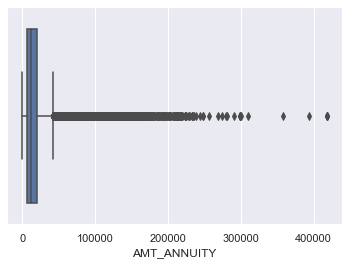

In [541]:
sns.boxplot(pre_data.AMT_ANNUITY)
plt.show()

In [542]:
print(pre_data['AMT_GOODS_PRICE'].describe().apply(lambda p: '%.2f' % p))

count    1284699.00
mean      227847.28
std       315396.56
min            0.00
25%        50841.00
50%       112320.00
75%       234000.00
max      6905160.00
Name: AMT_GOODS_PRICE, dtype: object


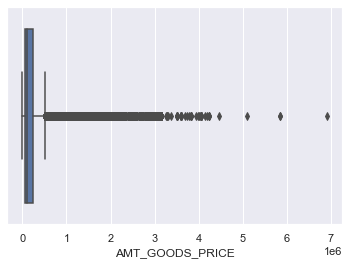

In [543]:
sns.boxplot(pre_data.AMT_GOODS_PRICE)
plt.show()

In [544]:
print(pre_data['AMT_CREDIT'].describe().apply(lambda p: '%.2f' % p))

count    1670213.00
mean      196114.02
std       318574.62
min            0.00
25%        24160.50
50%        80541.00
75%       216418.50
max      6905160.00
Name: AMT_CREDIT, dtype: object


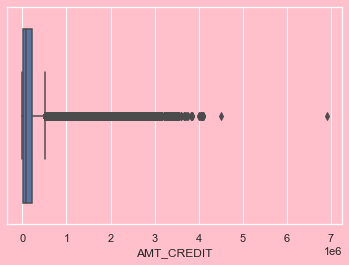

In [622]:
sns.boxplot(pre_data.AMT_CREDIT)
plt.show()

In [546]:
print(pre_data['CNT_PAYMENT'].describe().apply(lambda p: '%.2f' % p))

count    1297984.00
mean          16.05
std           14.57
min            0.00
25%            6.00
50%           12.00
75%           24.00
max           84.00
Name: CNT_PAYMENT, dtype: object


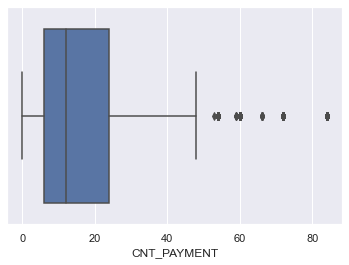

In [547]:
sns.boxplot(pre_data.CNT_PAYMENT)
plt.show()

#### UNIVARIATE ANALYSIS

In [549]:
pre_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

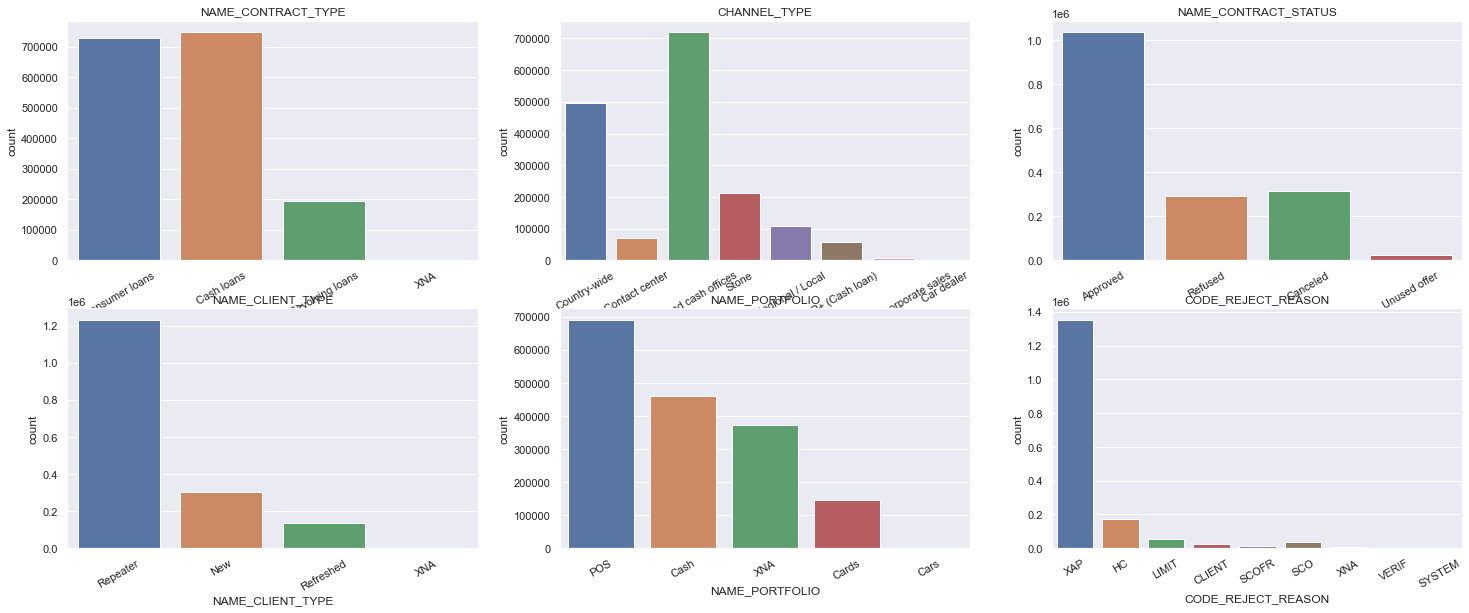

In [555]:
col_list = ['NAME_CONTRACT_TYPE', 'CHANNEL_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO', "CODE_REJECT_REASON" ]

x = 0

plt.figure(figsize = (25,15))

for column in col_list:
    
    x += 1
    plt.subplot(3,3,x)
    sns.countplot(x = column, data = pre_data)
    plt.xticks(rotation = 30)
    plt.title(column)
    

##### Summary:

NAME_CONTRACT_TYPE: More Consumer Loans and Less Revolving Loans
CHANNEL_TYPE: Except Contact center, AP+CashLoans and Car dealers all other are high in numbers.
NAME_CONTRACT_TYPE: Mostly approved, very less Refused and very few loans are cancelled.
NAME_CLIENT_TYPE: Most of the Clients are are repater client.
NAME_PORTFOLIO: POS are in huge numbers compare to Cash and cards.

### MERGING APPLICATION AND PREVIOUS DATA

In [558]:
application_cols_list = app_data_df.columns.to_list()
application_cols_list

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT_W_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'A

###### I will choose those columns which i want to work with from here. But i have to take SK_ID_CURR column as that is the common column between these two Dataframe.

In [563]:
application_cols_list = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AMT_INCOME_TOTAL','EXT_SOURCE_2','EXT_SOURCE_3']
application_data_to_merge = app_data_df[application_cols_list]

In [564]:
previous_cols_list = pre_data.columns.to_list()
previous_cols_list

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [567]:
previous_cols_list = ["SK_ID_CURR",'AMT_CREDIT','AMT_APPLICATION','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT','NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS']
previous_data_to_merge = pre_data[previous_cols_list]

In [568]:
merging_data = pd.merge(application_data_to_merge, previous_data_to_merge, on ='SK_ID_CURR', how = 'left')
merging_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AMT_INCOME_TOTAL,EXT_SOURCE_2,EXT_SOURCE_3,AMT_CREDIT,AMT_APPLICATION,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS
0,100002,1,M,Secondary / secondary special,Single / not married,202500.0,0.262949,0.139376,179055.0,179055.0,179055.0,9251.775,24.0,Consumer loans,Approved
1,100003,0,F,Higher education,Married,270000.0,0.622246,NaN,1035882.0,900000.0,900000.0,98356.995,12.0,Cash loans,Approved
2,100003,0,F,Higher education,Married,270000.0,0.622246,NaN,348637.5,337500.0,337500.0,64567.665,6.0,Consumer loans,Approved
3,100003,0,F,Higher education,Married,270000.0,0.622246,NaN,68053.5,68809.5,68809.5,6737.310,12.0,Consumer loans,Approved
4,100004,0,M,Secondary / secondary special,Single / not married,67500.0,0.555912,0.729567,20106.0,24282.0,24282.0,5357.250,4.0,Consumer loans,Approved


In [569]:
merging_data.shape

(1041093, 15)

In [570]:
merging_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041093 entries, 0 to 1041092
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_CURR            1041093 non-null  int64  
 1   TARGET                1041093 non-null  int64  
 2   CODE_GENDER           1041093 non-null  object 
 3   NAME_EDUCATION_TYPE   1041093 non-null  object 
 4   NAME_FAMILY_STATUS    1041093 non-null  object 
 5   AMT_INCOME_TOTAL      1041093 non-null  float64
 6   EXT_SOURCE_2          1039702 non-null  float64
 7   EXT_SOURCE_3          861639 non-null   float64
 8   AMT_CREDIT            1029002 non-null  float64
 9   AMT_APPLICATION       1029002 non-null  float64
 10  AMT_GOODS_PRICE       796815 non-null   float64
 11  AMT_ANNUITY           805673 non-null   float64
 12  CNT_PAYMENT           805678 non-null   float64
 13  NAME_CONTRACT_TYPE    1029002 non-null  object 
 14  NAME_CONTRACT_STATUS  1029002 non-

#### UNIVARIATE ANALYSIS

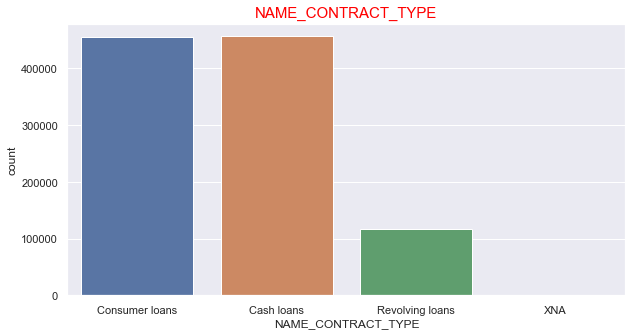

In [572]:
#NAME_CONTRACT_TYPE
plt.figure(figsize = (10,5))

sns.countplot(merging_data.NAME_CONTRACT_TYPE)
plt.title('NAME_CONTRACT_TYPE', color = 'red', fontsize =15)
plt.show()

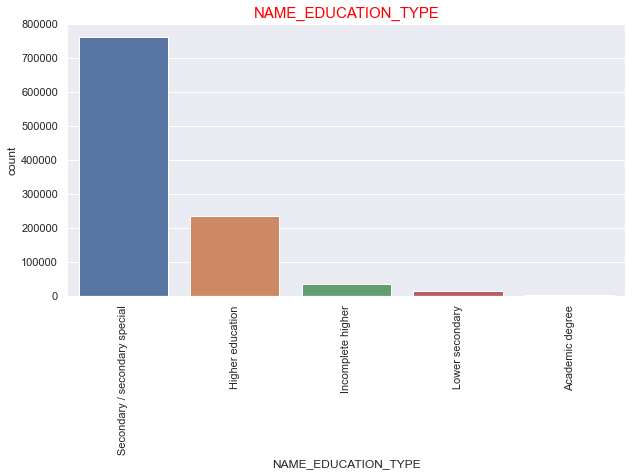

In [573]:
#NAME_EDUCATION_TYPE
plt.figure(figsize = (10,5))

sns.countplot(merging_data.NAME_EDUCATION_TYPE)
plt.title('NAME_EDUCATION_TYPE', color = 'red', fontsize =15)
plt.xticks(rotation = 90)
plt.show()

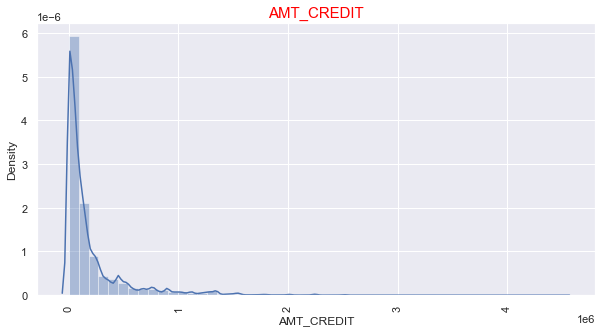

In [574]:
#CREDIT LOAN AMOUNT
plt.figure(figsize = (10,5))

sns.distplot(merging_data.AMT_CREDIT)
plt.title('AMT_CREDIT', color = 'red', fontsize =15)
plt.xticks(rotation = 90)
plt.show()

In [576]:
#Mostly Credited amount has been distributed between 50k to 1.5lakhs but also there is a 6lkahs one.

### BIVARIATE ANALYSIS


In [579]:
merging_data_corr = merging_data[['AMT_CREDIT', 'AMT_APPLICATION', 'AMT_ANNUITY', 'CNT_PAYMENT']]
merging_data_corr.head()

,AMT_CREDIT,AMT_APPLICATION,AMT_ANNUITY,CNT_PAYMENT
0,179055.0,179055.0,9251.775,24.0
1,1035882.0,900000.0,98356.995,12.0
2,348637.5,337500.0,64567.665,6.0
3,68053.5,68809.5,6737.310,12.0
4,20106.0,24282.0,5357.250,4.0


In [580]:
merging_data_corr.corr()

,AMT_CREDIT,AMT_APPLICATION,AMT_ANNUITY,CNT_PAYMENT
AMT_CREDIT,1.000000,0.975759,0.818348,0.675537
AMT_APPLICATION,0.975759,1.000000,0.810345,0.682902
AMT_ANNUITY,0.818348,0.810345,1.000000,0.399075
CNT_PAYMENT,0.675537,0.682902,0.399075,1.000000


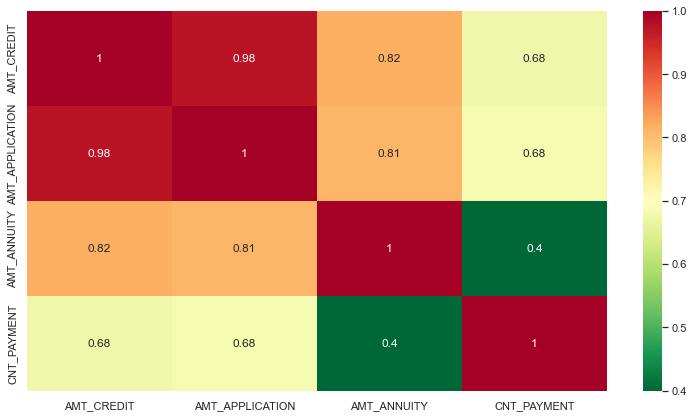

In [581]:
plt.figure(figsize = (13,7))
sns.heatmap(merging_data_corr.corr(), cmap = 'RdYlGn_r', annot = True )
plt.show()

In [583]:
#Summary:

#AMT_CREDIT & AMT_APPLICATION : Highly correlated, nearly 99%.
#AMT_CREDIT & AMT_ANNUITY : Highly Correlated, nearly 86%.
#AMT_ANNUITY & AMT_APPLICATION : Highly correlated, nearly 86%

In [584]:
column_lists = ['NAME_CONTRACT_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']

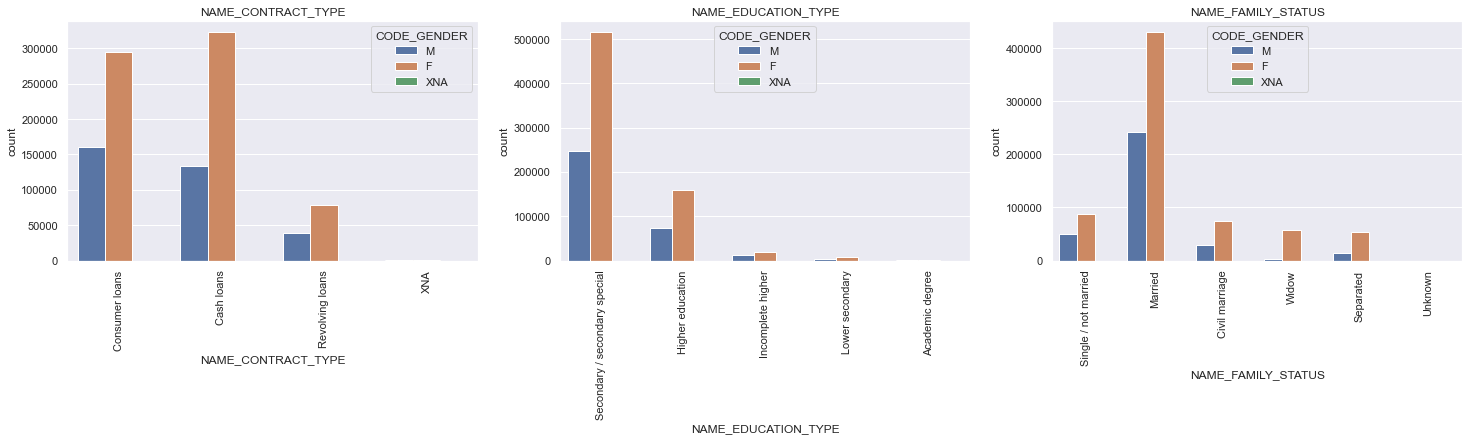

In [585]:
x = 0
plt.figure(figsize = (25,15))
for column in column_lists:
    x += 1
    plt.subplot(3,3,x)
    sns.countplot(x = column,hue = 'CODE_GENDER',data = merging_data)
    plt.xticks(rotation = 90)
    plt.title(column)

In [586]:
#Summary:

#Consumer loans are more taken by Female than Male.
#Secondary/Secondary Special Education type of female are more than male.
#More Married female member are taken loans compare to male.

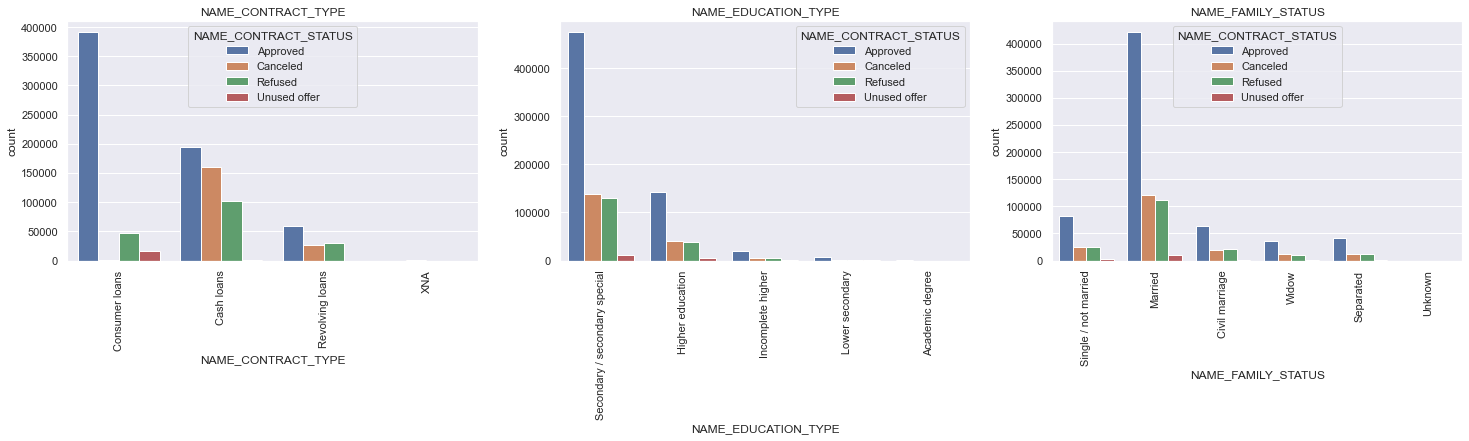

In [587]:
x = 0
plt.figure(figsize = (25,15))
for column in column_lists:
    x += 1
    plt.subplot(3,3,x)
    sns.countplot(x = column,hue = 'NAME_CONTRACT_STATUS',data = merging_data)
    plt.xticks(rotation = 90)
    plt.title(column)

In [588]:
#Summary:

#Highest no of contract got approval in consumer Loans.
#Highest no of contract got approval in secondary /secondary special education type.
#Highest no of contract got approved to those who are married.

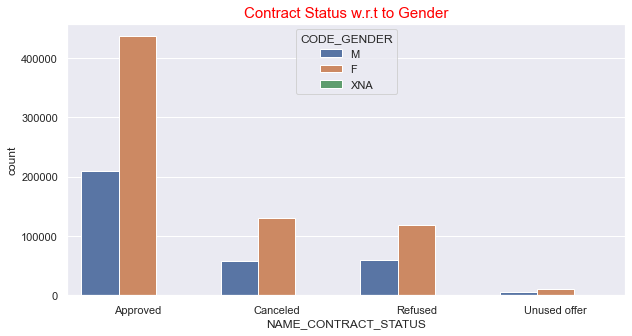

In [589]:
plt.figure(figsize = (10,5))

sns.countplot(x = "NAME_CONTRACT_STATUS", hue = "CODE_GENDER", data = merging_data)
plt.title('Contract Status w.r.t to Gender', color = 'red', fontsize = '15')
plt.show()

In [590]:
#Summary:

#Female contracts got approved more compared to male.
#Female contracts also got refused more compare to male but that is nearly negligible and Less in numbers compare to approval.

In [591]:
merging_data.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'AMT_INCOME_TOTAL', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_CREDIT', 'AMT_APPLICATION', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_PAYMENT', 'NAME_CONTRACT_TYPE',
       'NAME_CONTRACT_STATUS'],
      dtype='object')

In [593]:
merge_targetvalue_0 = merging_data[(merging_data.TARGET == 0)]
merge_targetvalue_0.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AMT_INCOME_TOTAL,EXT_SOURCE_2,EXT_SOURCE_3,AMT_CREDIT,AMT_APPLICATION,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS
1,100003,0,F,Higher education,Married,270000.0,0.622246,NaN,1035882.0,900000.0,900000.0,98356.995,12.0,Cash loans,Approved
2,100003,0,F,Higher education,Married,270000.0,0.622246,NaN,348637.5,337500.0,337500.0,64567.665,6.0,Consumer loans,Approved
3,100003,0,F,Higher education,Married,270000.0,0.622246,NaN,68053.5,68809.5,68809.5,6737.310,12.0,Consumer loans,Approved
4,100004,0,M,Secondary / secondary special,Single / not married,67500.0,0.555912,0.729567,20106.0,24282.0,24282.0,5357.250,4.0,Consumer loans,Approved
5,100006,0,F,Secondary / secondary special,Civil marriage,135000.0,0.650442,NaN,675000.0,675000.0,675000.0,24246.000,48.0,Cash loans,Approved


In [594]:
merge_targetvalue_1 = merging_data[(merging_data.TARGET == 0)]
merge_targetvalue_1.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,AMT_INCOME_TOTAL,EXT_SOURCE_2,EXT_SOURCE_3,AMT_CREDIT,AMT_APPLICATION,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS
1,100003,0,F,Higher education,Married,270000.0,0.622246,NaN,1035882.0,900000.0,900000.0,98356.995,12.0,Cash loans,Approved
2,100003,0,F,Higher education,Married,270000.0,0.622246,NaN,348637.5,337500.0,337500.0,64567.665,6.0,Consumer loans,Approved
3,100003,0,F,Higher education,Married,270000.0,0.622246,NaN,68053.5,68809.5,68809.5,6737.310,12.0,Consumer loans,Approved
4,100004,0,M,Secondary / secondary special,Single / not married,67500.0,0.555912,0.729567,20106.0,24282.0,24282.0,5357.250,4.0,Consumer loans,Approved
5,100006,0,F,Secondary / secondary special,Civil marriage,135000.0,0.650442,NaN,675000.0,675000.0,675000.0,24246.000,48.0,Cash loans,Approved


##### DEFAULTERS CORRELATION

In [601]:
cols_list1 = ['AMT_INCOME_TOTAL','AMT_ANNUITY', 'CNT_PAYMENT', 'NAME_CONTRACT_TYPE']

In [602]:
merge_corr_for_defaulters = merge_targetvalue_1[cols_list1]
merge_corr_for_defaulters.head()

,AMT_INCOME_TOTAL,AMT_ANNUITY,CNT_PAYMENT,NAME_CONTRACT_TYPE
1,270000.0,98356.995,12.0,Cash loans
2,270000.0,64567.665,6.0,Consumer loans
3,270000.0,6737.310,12.0,Consumer loans
4,67500.0,5357.250,4.0,Consumer loans
5,135000.0,24246.000,48.0,Cash loans


In [603]:
merge_corr_for_defaulters.corr()

,AMT_INCOME_TOTAL,AMT_ANNUITY,CNT_PAYMENT
AMT_INCOME_TOTAL,1.000000,0.225587,0.040953
AMT_ANNUITY,0.225587,1.000000,0.393106
CNT_PAYMENT,0.040953,0.393106,1.000000


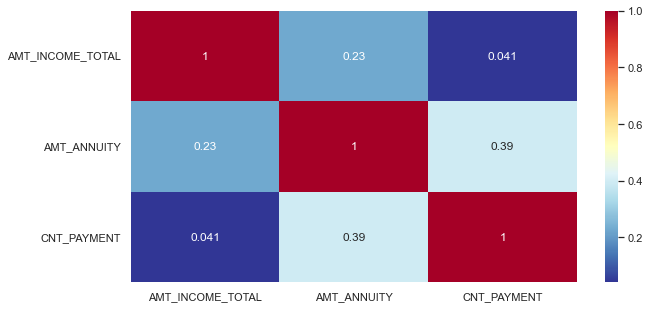

In [604]:
plt.figure(figsize = (10,5))
sns.heatmap(merge_corr_for_defaulters.corr(), cmap = 'RdYlBu_r', annot = True)
plt.show()

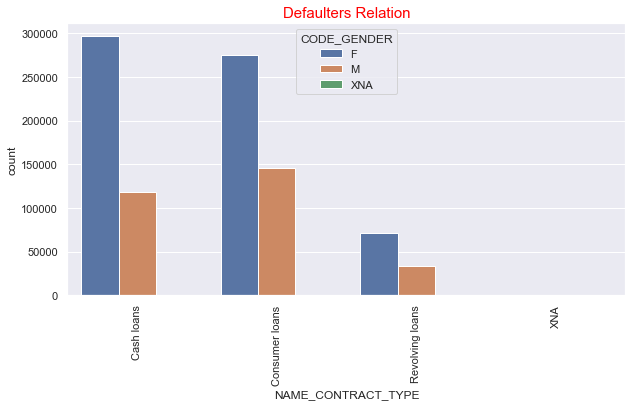

In [605]:
plt.figure(figsize = (10,5))
sns.countplot(x = merge_targetvalue_1.NAME_CONTRACT_TYPE,hue = merge_targetvalue_1.CODE_GENDER, data = merge_targetvalue_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

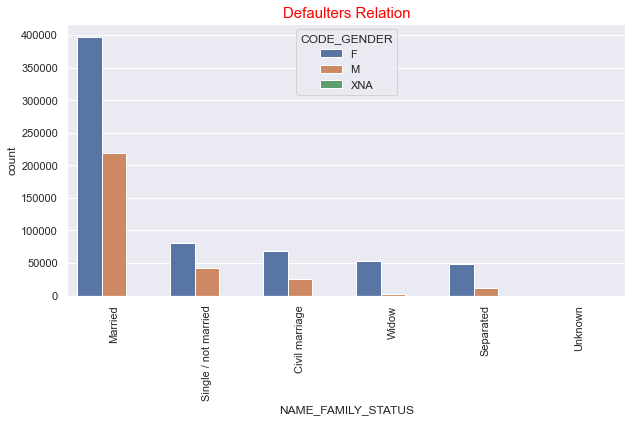

In [609]:
plt.figure(figsize = (10,5))
sns.countplot(x = merge_targetvalue_1.NAME_FAMILY_STATUS,hue = merge_targetvalue_1.CODE_GENDER, data = merge_targetvalue_1)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

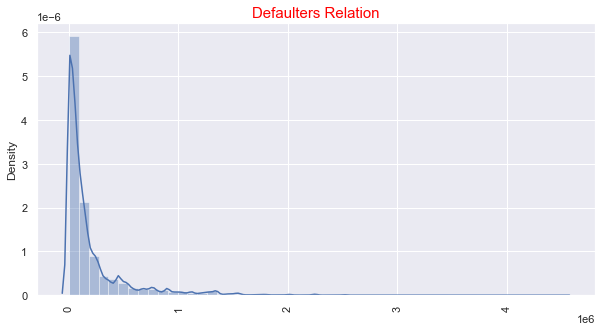

In [611]:
plt.figure(figsize = (10,5))
sns.distplot(x = merge_targetvalue_1.AMT_CREDIT)
plt.title("Defaulters Relation", color = 'red', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [612]:
#conclusion

In [620]:
#Married people are struggling to pay the loan bill in comparison to single and separated people.More no of approved people are married. From next time onwards we need to give loan to those who are either single or divorced.
#Lower credit amount people else really higher credit amount people are having high chance to becoming a defaulters.
#Female Gender are more likely to not face payment difficulties then the male and hence it is recommended to approve more loans of Female Gender than the male gender at the same Female are High in number than who face difficulties than males.
#In Contract type, female with consumer loans type are having more no of defaulters.
#Secondary/ secondary special people with education are struggling to pay their loan bill and becoming defaulters.